<a href="https://colab.research.google.com/github/onefemi/Machine_Learning_project/blob/main/flu_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Dependencies

In [ ]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=07e37b464a1241fbcf235796a85aa3631caf7097d6d848a9001b6e2bfcfc2da5
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
!pip install pyunpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 4.9 MB/s eta 0:00:00


# Tensor

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install --upgrade tensorflow-federated==0.50.0
!pip install tensorflow-federated

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.0/40.0 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 44.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.0/349.0 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.7/142.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 

# Data Preprocessing

In [ ]:
import os
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from pyspark.sql.types import *
#from pyspark.sql.functions import count, avg, sum, col, to_date
from pyspark.sql.functions import col,isnan,avg,sum,when,count,to_date,round,explode,lit,year,expr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
# Import seaborn
import seaborn as sns

spark = SparkSession \
    .builder \
    .appName("Flu Detection") \
    .config("spark.driver.maxResultSize", "6G") \
    .getOrCreate()

spark

# Apply the default theme
sns.set_theme()
# Set directory path where JSON files are stored
directory = './files/'
dataset_list = []
member_list = []
device_list = []
md = []

In [ ]:
from pyunpack import Archive

file_path = "rawfiles.7z"

temp_folder = "temp_folder"


# Create the temporary folder if it does not exist
if not os.path.exists(temp_folder):
    os.makedirs(temp_folder)

# Extract all of the files to the temporary folder
Archive(file_path).extractall(temp_folder)

In [ ]:
!ls

rawfiles.7z  sample_data  temp_folder


In [ ]:
import shutil

#members_f = ['45770956.json','94704159.json','49795674.json','60835440.json','86987103.json','83912205.json','64808915.json','98369547.json','60899308.json','49855651.json','37588849.json','58963975.json']

#Perfect one
members_f = ['45770956.json','49795674.json','60835440.json','83912205.json','98369547.json','60899308.json','49855651.json',
#             '58963975.json', '02631468.json', '33263009.json','86987103.json', '07965090.json', '05321037.json'
              '48038725.json', '50484392.json', '81943862.json','53315619.json','94704159.json','37588849.json','64808915.json']



#,'94439721.json'

# no flu  '48038725.json', '50484392.json', '81943862.json', '33263009.json', '78177134.json', '02631468.json']

#additions
#'53315619.json', '02631468.json', '05321037.json', '07965090.json',

#'11299578.json - oura, '18399465.json' - oura, '41670826.json' - fever]


os.makedirs("./files/")

# Copy the file to the destination folder
for x in members_f:
    shutil.copy(os.path.join("./temp_folder/", x), "./files/")


In [ ]:
# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".json"):
        dfile = os.path.join(directory, filename)
        member = filename.split('.')[0]

        #extract file member filename
        member = (dfile.split('/')[2]).split('.')[0]

        print(member)

        #add to member list
        member_list.append(member)

        #load json file
        df = spark.read.option("multiline","true").json(dfile)

        #extract device from column name
        device = df.schema.names[0].split("_")[0]

        #add to device list
        device_list.append(device)

        md.append([member, device])

        # Explode 'fitbit_summary' array
        df_hr = df.select(explode(df[0]).alias('heart_summary'))

        # Flatten 'fitbit_summary' nested structure
        df_flat_hr = df_hr.selectExpr(
            f"'{member}' as member",
            f"'{device}' as device_name",
            'heart_summary.timestamp as hr_timestamp',
            'heart_summary.data.heart_rate as heart_rate'
        )

        #streamline date
        df_flat_hr = df_flat_hr.withColumn('ddate', to_date('hr_timestamp')).drop('hr_timestamp')



        # Explode 'symptom_report' array
        df_symptom = df.select(explode(df[1]).alias('symptom_report'))



        # Flatten 'symptom_report' nested structure
        df_flat_symptom = df_symptom.selectExpr(
            f"'{member}' as member",
            f"'{device}' as device_name",
            'symptom_report.timestamp as symptom_timestamp',
            'symptom_report.data.fever as fever',
            'symptom_report.data.fever_guess as fever_guess',
            'symptom_report.data.notes as notes',
            'symptom_report.data.other_symptoms as other_symptoms',
            'symptom_report.data.suspected_virus as suspected_virus',
            'symptom_report.data.symptom_anosmia as symptom_anosmia',
            'symptom_report.data.symptom_body_ache as symptom_body_ache',
            'symptom_report.data.symptom_chills as symptom_chills',
            'symptom_report.data.symptom_cough as symptom_cough',
            'symptom_report.data.symptom_diarrhea as symptom_diarrhea',
            'symptom_report.data.symptom_fatigue as symptom_fatigue',
            'symptom_report.data.symptom_headache as symptom_headache',
            'symptom_report.data.symptom_nausea as symptom_nausea',
            'symptom_report.data.symptom_runny_nose as symptom_runny_nose',
            'symptom_report.data.symptom_short_breath as symptom_short_breath',
            'symptom_report.data.symptom_sore_throat as symptom_sore_throat',
            'symptom_report.data.symptom_wet_cough as symptom_wet_cough'
        )


        #streamline date
        df_flat_symptom = df_flat_symptom.withColumn('ddate', to_date('symptom_timestamp')).drop('symptom_timestamp')

        df_merged = df_flat_hr.join(df_flat_symptom, ['ddate','member','device_name'], how='left')

        df_merged = df_merged.fillna(0)

        df_merged_agg = df_merged.groupby('ddate','member','device_name').agg(
            avg('heart_rate').astype(IntegerType()).alias('avg_heart_rate'),
            sum('fever').astype(IntegerType()).alias('symptom_fever'),
            sum('fever_guess').astype(IntegerType()).alias('symptom_fever_guess'),
            sum('symptom_anosmia').astype(IntegerType()).alias('symptom_anosmia'),
            sum('symptom_body_ache').astype(IntegerType()).alias('symptom_body_ache'),
            sum('symptom_chills').astype(IntegerType()).alias('symptom_chills'),
            sum('symptom_cough').astype(IntegerType()).alias('symptom_cough'),
            sum('symptom_diarrhea').astype(IntegerType()).alias('symptom_diarrhea'),
            sum('symptom_fatigue').astype(IntegerType()).alias('symptom_fatigue'),
            sum('symptom_headache').astype(IntegerType()).alias('symptom_headache'),
            sum('symptom_nausea').astype(IntegerType()).alias('symptom_nausea'),
            sum('symptom_runny_nose').astype(IntegerType()).alias('symptom_runny_nose'),
            sum('symptom_short_breath').astype(IntegerType()).alias('symptom_short_breath'),
            sum('symptom_sore_throat').astype(IntegerType()).alias('symptom_sore_throat'),
            sum('symptom_wet_cough').astype(IntegerType()).alias('symptom_wet_cough'),

        )

        df_merged_agg = df_merged_agg.withColumn('flu', lit(0))

        # list of symptom columns to check for flu
        #'symptom_fever', 'symptom_fever_guess',
        #symptom_cols = ['symptom_anosmia', 'symptom_body_ache','symptom_fatigue','symptom_nausea','symptom_runny_nose', 'symptom_short_breath', 'symptom_sore_throat']
        #symptom_anosmia + symptom_body_ache + symptom_fatigue + symptom_nausea + symptom_short_breath + symptom_sore_throat
        df_merged_agg = df_merged_agg.withColumn(
            'flu',
            expr(
                "CASE WHEN (symptom_runny_nose > 0 AND \
                          ((symptom_headache + symptom_diarrhea + symptom_cough + symptom_body_ache + symptom_fatigue + symptom_sore_throat) > 0)) \
                      THEN 1 \
                      ELSE flu \
                END"
            )
        )


        #for col_name in symptom_cols:
        #    df_merged_agg = df_merged_agg.withColumn('flu', when(col(col_name) > 0, 1).otherwise(col('flu')))


        dataset_list.append(df_merged_agg)


60835440
53315619
60899308
81943862
94704159
64808915
45770956
49855651
48038725
37588849
49795674
83912205
98369547
50484392


# Merging all datasets

In [ ]:
from functools import reduce
dfc = reduce(lambda x, y: x.union(y), dataset_list)

# Schema

In [ ]:
dfc.printSchema()

root
 |-- ddate: date (nullable = true)
 |-- member: string (nullable = false)
 |-- device_name: string (nullable = false)
 |-- avg_heart_rate: integer (nullable = true)
 |-- symptom_fever: integer (nullable = true)
 |-- symptom_fever_guess: integer (nullable = true)
 |-- symptom_anosmia: integer (nullable = true)
 |-- symptom_body_ache: integer (nullable = true)
 |-- symptom_chills: integer (nullable = true)
 |-- symptom_cough: integer (nullable = true)
 |-- symptom_diarrhea: integer (nullable = true)
 |-- symptom_fatigue: integer (nullable = true)
 |-- symptom_headache: integer (nullable = true)
 |-- symptom_nausea: integer (nullable = true)
 |-- symptom_runny_nose: integer (nullable = true)
 |-- symptom_short_breath: integer (nullable = true)
 |-- symptom_sore_throat: integer (nullable = true)
 |-- symptom_wet_cough: integer (nullable = true)
 |-- flu: integer (nullable = false)



In [ ]:
dfc.count()

6462

# Members and the wearable brand used

In [ ]:
dz = dfc.select(['device_name', 'member']).sort('device_name')
dz.distinct().show()

+-----------+--------+
|device_name|  member|
+-----------+--------+
|     fitbit|60835440|
|     garmin|53315619|
|     fitbit|60899308|
|     garmin|81943862|
|      apple|94704159|
|     fitbit|64808915|
|     fitbit|45770956|
|     fitbit|49855651|
|     fitbit|48038725|
|      apple|37588849|
|     fitbit|49795674|
|     fitbit|83912205|
|     fitbit|98369547|
|     garmin|50484392|
+-----------+--------+



In [ ]:
dfc.sort(['ddate', 'member']).show(1)

+----------+--------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|     ddate|  member|device_name|avg_heart_rate|symptom_fever|symptom_fever_guess|symptom_anosmia|symptom_body_ache|symptom_chills|symptom_cough|symptom_diarrhea|symptom_fatigue|symptom_headache|symptom_nausea|symptom_runny_nose|symptom_short_breath|symptom_sore_throat|symptom_wet_cough|flu|
+----------+--------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|2020-03-05|49855651|     fitbit|          null|         null|               null|              0|                0|     

# Count of entries with heart rate above 65

In [ ]:
dfc.filter(col('avg_heart_rate') > 65).count()

227

# Members with flu

In [ ]:
#members with flu
dt = dfc.select(col('member')).where(col('flu') == 1)
withflu = [row['member'] for row in dt.distinct().collect()]

In [ ]:
withflu

['60835440',
 '53315619',
 '60899308',
 '45770956',
 '49855651',
 '83912205',
 '98369547']

# Members without flu

In [ ]:
#members without flu
noflu = [elem for elem in member_list if elem not in withflu]
noflu

['81943862',
 '94704159',
 '64808915',
 '48038725',
 '37588849',
 '49795674',
 '50484392']

# Descriptive Analysis

In [ ]:
dfc.summary("count").show()

+-------+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+----+
|summary|member|device_name|avg_heart_rate|symptom_fever|symptom_fever_guess|symptom_anosmia|symptom_body_ache|symptom_chills|symptom_cough|symptom_diarrhea|symptom_fatigue|symptom_headache|symptom_nausea|symptom_runny_nose|symptom_short_breath|symptom_sore_throat|symptom_wet_cough| flu|
+-------+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+----+
|  count|  6462|       6462|          5078|         1997|                  0|           6462|             6462|          6462|       

In [ ]:
dfc.head(2)

[Row(ddate=datetime.date(2020, 11, 22), member='60835440', device_name='fitbit', avg_heart_rate=60, symptom_fever=None, symptom_fever_guess=None, symptom_anosmia=0, symptom_body_ache=0, symptom_chills=0, symptom_cough=0, symptom_diarrhea=0, symptom_fatigue=0, symptom_headache=0, symptom_nausea=0, symptom_runny_nose=0, symptom_short_breath=0, symptom_sore_throat=0, symptom_wet_cough=0, flu=0),
 Row(ddate=datetime.date(2021, 2, 12), member='60835440', device_name='fitbit', avg_heart_rate=57, symptom_fever=None, symptom_fever_guess=None, symptom_anosmia=0, symptom_body_ache=0, symptom_chills=0, symptom_cough=0, symptom_diarrhea=0, symptom_fatigue=0, symptom_headache=0, symptom_nausea=0, symptom_runny_nose=0, symptom_short_breath=0, symptom_sore_throat=0, symptom_wet_cough=0, flu=0)]

In [ ]:
dfc.tail(2)

[Row(ddate=datetime.date(2021, 1, 30), member='50484392', device_name='garmin', avg_heart_rate=49, symptom_fever=None, symptom_fever_guess=None, symptom_anosmia=0, symptom_body_ache=0, symptom_chills=0, symptom_cough=0, symptom_diarrhea=0, symptom_fatigue=0, symptom_headache=0, symptom_nausea=0, symptom_runny_nose=0, symptom_short_breath=0, symptom_sore_throat=0, symptom_wet_cough=0, flu=0),
 Row(ddate=datetime.date(2021, 9, 19), member='50484392', device_name='garmin', avg_heart_rate=50, symptom_fever=None, symptom_fever_guess=None, symptom_anosmia=0, symptom_body_ache=0, symptom_chills=0, symptom_cough=0, symptom_diarrhea=0, symptom_fatigue=0, symptom_headache=0, symptom_nausea=0, symptom_runny_nose=0, symptom_short_breath=0, symptom_sore_throat=0, symptom_wet_cough=0, flu=0)]

In [ ]:
#number of NA values
dfc.select([count(when(isnan(c), c)).alias(c) for c in dfc.columns[1:23]]).show()

+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|member|device_name|avg_heart_rate|symptom_fever|symptom_fever_guess|symptom_anosmia|symptom_body_ache|symptom_chills|symptom_cough|symptom_diarrhea|symptom_fatigue|symptom_headache|symptom_nausea|symptom_runny_nose|symptom_short_breath|symptom_sore_throat|symptom_wet_cough|flu|
+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|     0|          0|             0|            0|                  0|              0|                0|             0|            0|               0|           

In [ ]:
#no of null values
dfc.select([count(when(col(c).isNull(), c)).alias(c) for c in dfc.columns]).show()

+-----+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|ddate|member|device_name|avg_heart_rate|symptom_fever|symptom_fever_guess|symptom_anosmia|symptom_body_ache|symptom_chills|symptom_cough|symptom_diarrhea|symptom_fatigue|symptom_headache|symptom_nausea|symptom_runny_nose|symptom_short_breath|symptom_sore_throat|symptom_wet_cough|flu|
+-----+------+-----------+--------------+-------------+-------------------+---------------+-----------------+--------------+-------------+----------------+---------------+----------------+--------------+------------------+--------------------+-------------------+-----------------+---+
|    0|     0|          0|          1384|         4465|               6462|              0|                0|             0|            0|    

In [ ]:
#number of duplicates rows
dfc.groupBy(dfc.columns)\
    .count()\
    .where(col('count') > 1) \
    .select(sum('count')).alias("No of duplicate rows") \
    .show()

+----------+
|sum(count)|
+----------+
|      null|
+----------+



In [ ]:
#dataset summary
dfc.describe(['avg_heart_rate','flu']).show()

+-------+-----------------+--------------------+
|summary|   avg_heart_rate|                 flu|
+-------+-----------------+--------------------+
|  count|             5078|                6462|
|   mean|53.93009058684522|0.006499535747446...|
| stddev|6.778759626054129| 0.08036349425314734|
|    min|               31|                   0|
|    max|               84|                   1|
+-------+-----------------+--------------------+



In [ ]:
#Create template for allphysio
dfc.createOrReplaceTempView("dfp")

In [ ]:
fd = spark.sql('select * from dfp where avg_heart_rate is not null')

In [ ]:
for m in member_list:
    c = fd.select(['ddate', 'member', 'device_name', 'avg_heart_rate', 'flu']).where(col('member') == m).count()
    print('for member {0} there are {1} records that include heartbeat'.format(m, c))

for member 60835440 there are 198 records that include heartbeat
for member 53315619 there are 660 records that include heartbeat
for member 60899308 there are 358 records that include heartbeat
for member 81943862 there are 578 records that include heartbeat
for member 94704159 there are 39 records that include heartbeat
for member 64808915 there are 983 records that include heartbeat
for member 45770956 there are 108 records that include heartbeat
for member 49855651 there are 618 records that include heartbeat
for member 48038725 there are 20 records that include heartbeat
for member 37588849 there are 20 records that include heartbeat
for member 49795674 there are 156 records that include heartbeat
for member 83912205 there are 21 records that include heartbeat
for member 98369547 there are 1038 records that include heartbeat
for member 50484392 there are 281 records that include heartbeat


In [ ]:
for m in member_list:
    c = fd.select(['ddate', 'member', 'device_name', 'avg_heart_rate', 'flu']).where((col('member') == m) & (year('ddate') == 2022)).count()
    print('for member {0} there are {1} records that include heartbeat'.format(m, c))

for member 60835440 there are 0 records that include heartbeat
for member 53315619 there are 111 records that include heartbeat
for member 60899308 there are 0 records that include heartbeat
for member 81943862 there are 2 records that include heartbeat
for member 94704159 there are 39 records that include heartbeat
for member 64808915 there are 364 records that include heartbeat
for member 45770956 there are 0 records that include heartbeat
for member 49855651 there are 49 records that include heartbeat
for member 48038725 there are 15 records that include heartbeat
for member 37588849 there are 0 records that include heartbeat
for member 49795674 there are 0 records that include heartbeat
for member 83912205 there are 0 records that include heartbeat
for member 98369547 there are 353 records that include heartbeat
for member 50484392 there are 0 records that include heartbeat


# Data Filtering

In [ ]:
from pyspark.sql.functions import *

In [ ]:
#heart rate accross all devices over the years
zf = fd.select('ddate', 'device_name', 'avg_heart_rate') \
       .groupBy('device_name', to_date('ddate', 'yyyy-MM-dd').alias('date_month')) \
       .agg(mean('avg_heart_rate').alias('heart_rate')) \
       .orderBy('date_month') \
       .toPandas()

#heart rate accross all fitbit devices over the years
zf1 = fd.select('ddate', 'device_name', 'avg_heart_rate')\
             .where('device_name == "fitbit"')\
             .groupBy('ddate', 'device_name')\
             .agg(mean('avg_heart_rate').alias('avg_heart_rate'))\
             .orderBy('ddate')\
             .toPandas()

#heart rate accross all apple devices over the years
zf2 = fd.select('ddate', 'device_name', 'avg_heart_rate')\
             .where('device_name == "apple"')\
             .groupBy('ddate', 'device_name')\
             .agg(mean('avg_heart_rate').alias('avg_heart_rate'))\
             .orderBy('ddate')\
             .toPandas()

#heart rate accross all garmin devices over the years
zf3 = fd.select('ddate', 'device_name', 'avg_heart_rate')\
             .where('device_name == "garmin"')\
             .groupBy('ddate', 'device_name')\
             .agg(mean('avg_heart_rate').alias('avg_heart_rate'))\
             .orderBy('ddate')\
             .toPandas()

# TimeSeries Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
#Convert the Pandas Dataframe to be TimeIndexed
zf.date_month = zf.date_month.astype('datetime64[ns]')
zf1.ddate = zf1.ddate.astype('datetime64[ns]')
zf2.ddate = zf2.ddate.astype('datetime64[ns]')
zf3.ddate = zf3.ddate.astype('datetime64[ns]')

zf = zf.set_index(pd.to_datetime(zf.date_month))
zf1 = zf1.set_index(pd.to_datetime(zf1.ddate))
zf2 = zf2.set_index(pd.to_datetime(zf2.ddate))
zf3 = zf3.set_index(pd.to_datetime(zf3.ddate))

zf
#zf1
#zf2
#zf3

,device_name,date_month,heart_rate
date_month,,,
2020-03-05,fitbit,2020-03-05,54.0
2020-03-06,fitbit,2020-03-06,64.5
2020-03-07,fitbit,2020-03-07,63.0
2020-03-08,fitbit,2020-03-08,63.5
2020-03-09,fitbit,2020-03-09,62.5
...,...,...,...
2023-02-22,fitbit,2023-02-22,56.0
2023-02-23,fitbit,2023-02-23,56.0
2023-02-24,fitbit,2023-02-24,56.0


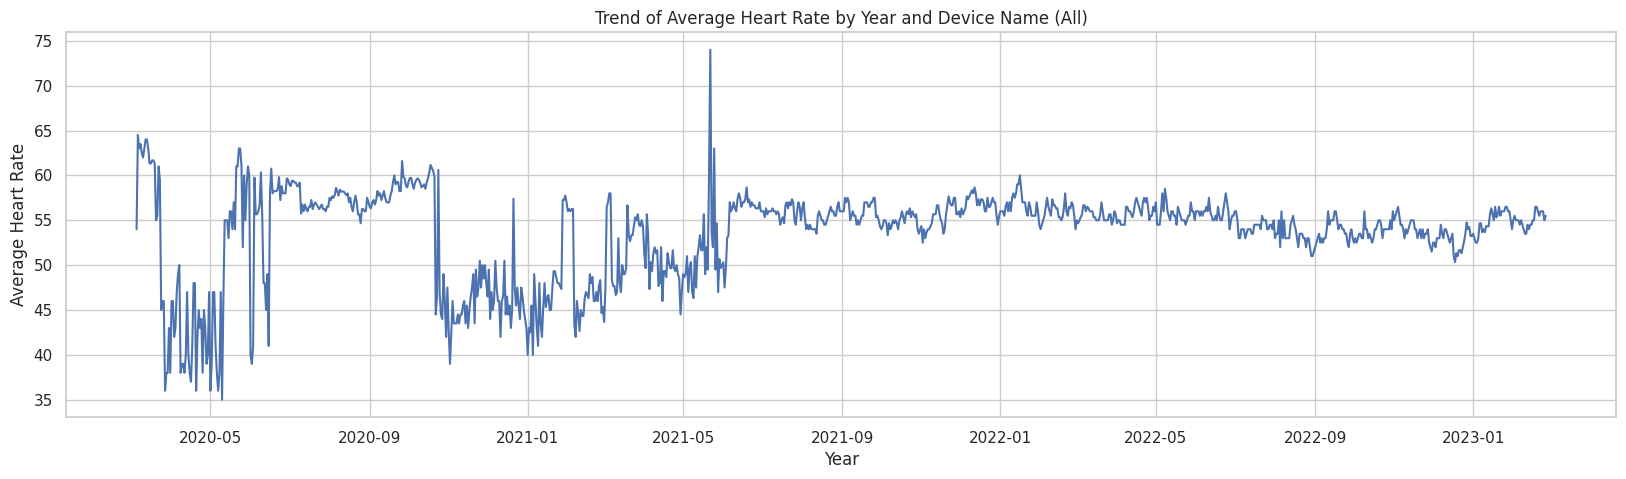

In [ ]:
#An initial Lineplot
# create the line plot using seaborn

zf = zf.drop_duplicates(subset=['date_month'], keep='last')

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x='date_month', y='heart_rate', data=zf)

# set the title and axis labels
plt.title('Trend of Average Heart Rate by Year and Device Name (All)')
plt.xlabel('Year')
plt.ylabel('Average Heart Rate')

# display the plot
plt.show()

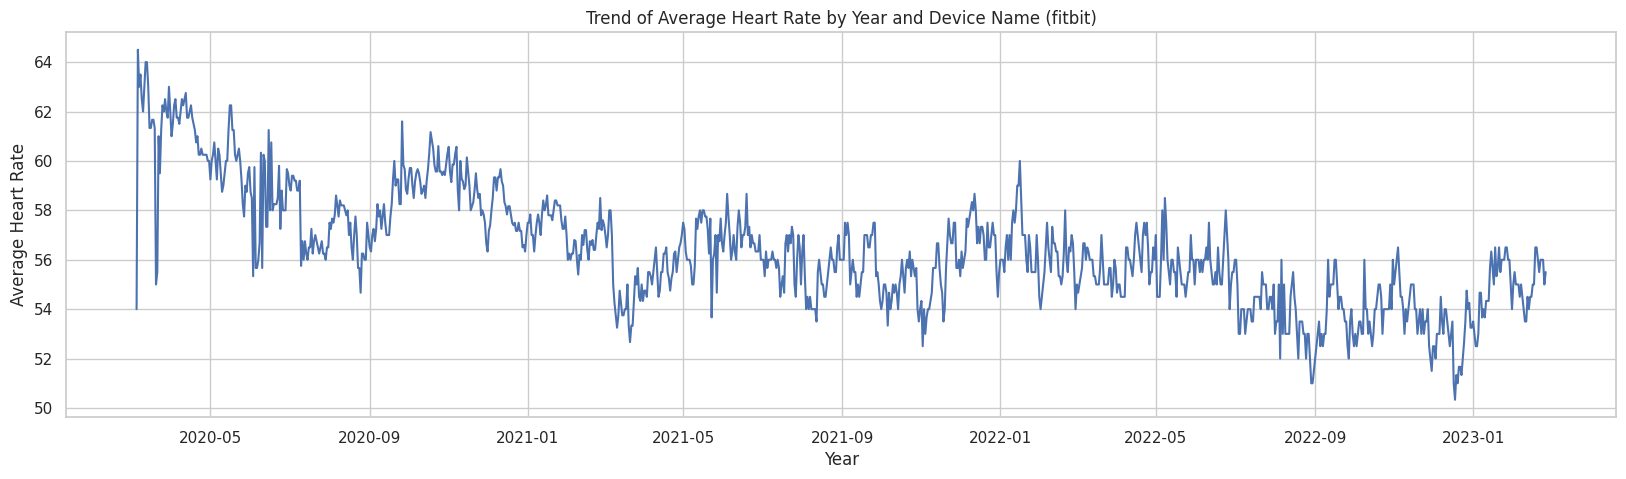

In [ ]:
#An initial Lineplot
# create the line plot using seaborn
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x='ddate', y='avg_heart_rate', data=zf1)

# set the title and axis labels
plt.title('Trend of Average Heart Rate by Year and Device Name (fitbit)')
plt.xlabel('Year')
plt.ylabel('Average Heart Rate')

# display the plot
plt.show()

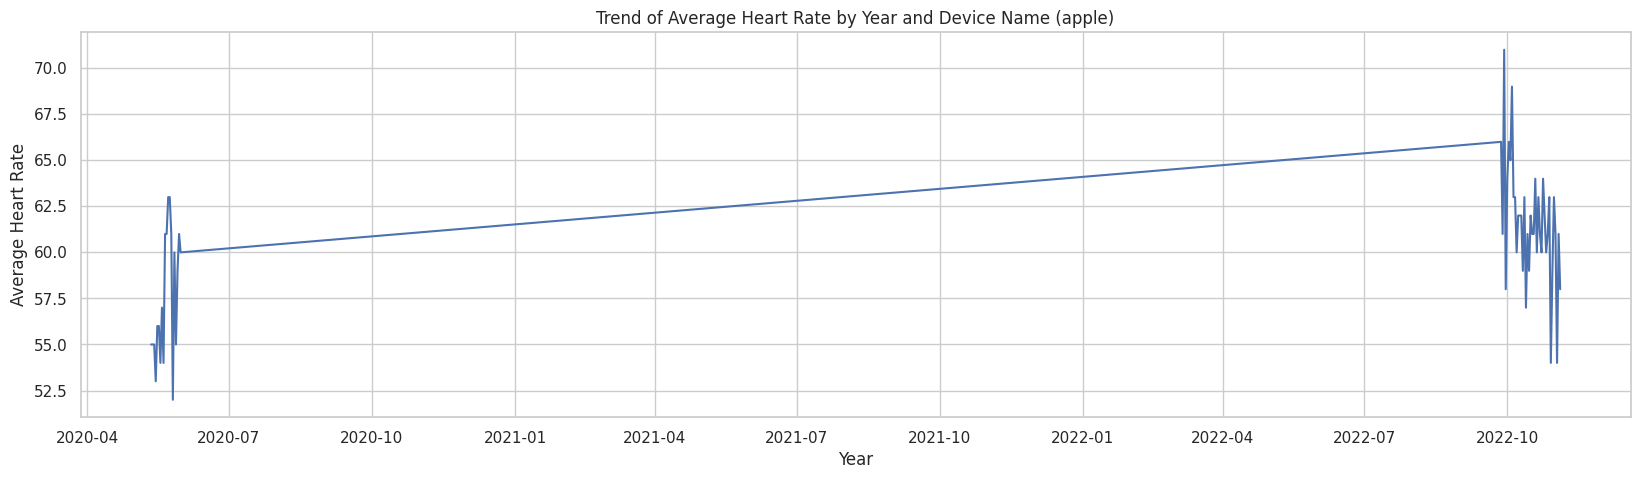

In [ ]:
#An initial Lineplot
# create the line plot using seaborn
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x='ddate', y='avg_heart_rate', data=zf2)

# set the title and axis labels
plt.title('Trend of Average Heart Rate by Year and Device Name (apple)')
plt.xlabel('Year')
plt.ylabel('Average Heart Rate')

# display the plot
plt.show()

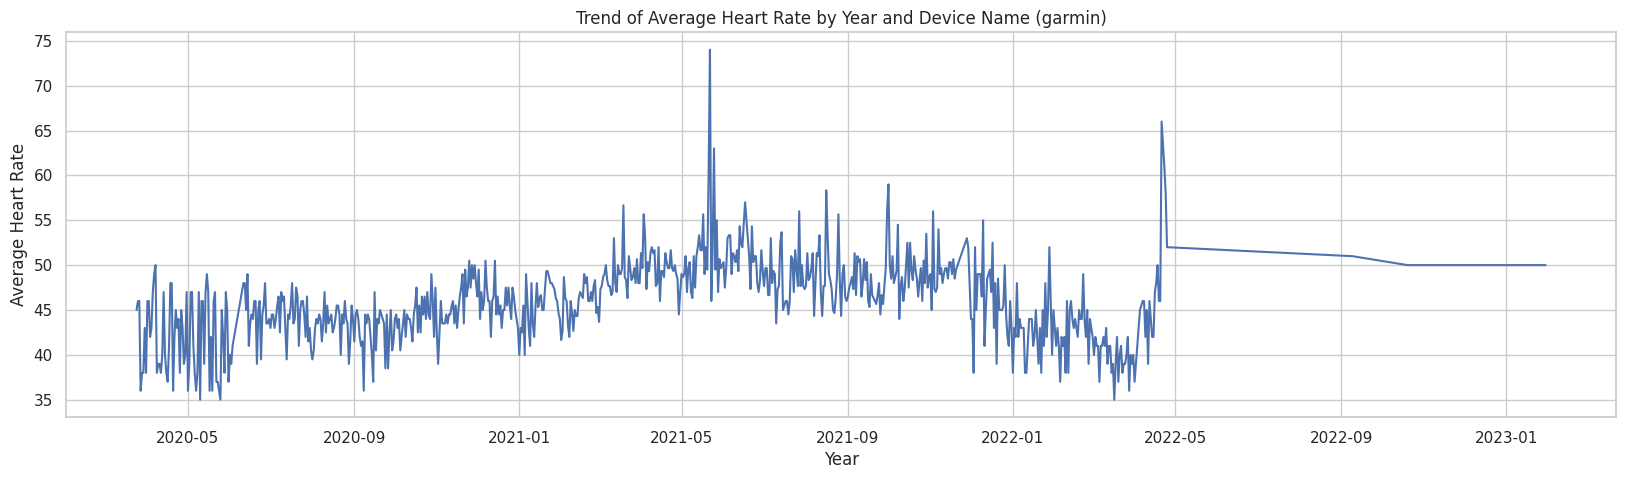

In [ ]:
#An initial Lineplot
# create the line plot using seaborn
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x='ddate', y='avg_heart_rate', data=zf3)

# set the title and axis labels
plt.title('Trend of Average Heart Rate by Year and Device Name (garmin)')
plt.xlabel('Year')
plt.ylabel('Average Heart Rate')

# display the plot
plt.show()

# Symptoms Analysis

In [ ]:
fd.corr('flu','symptom_cough')

0.4482651770058494

In [ ]:
fd.corr('flu','symptom_anosmia')

0.21979832416375786

In [ ]:
fd.corr('flu','symptom_body_ache')

0.38317434317263555

In [ ]:
fd.corr('flu','symptom_chills')

0.2535273960998499

In [ ]:
fd.corr('flu','symptom_fatigue')

0.3688678080763342

In [ ]:
fd.corr('flu','symptom_runny_nose')

0.6907094461358777

In [ ]:
fd.corr('flu','symptom_short_breath')

0.21608004138009462

In [ ]:
fd.corr('flu','symptom_sore_throat')

0.3558191049956358

In [ ]:
fd.corr('flu','symptom_wet_cough')

0.34106744224685626

In [ ]:
fd.corr('flu','symptom_fatigue')

0.3688678080763342

In [ ]:
fd.corr('flu','symptom_nausea')

0.041546607584992526

In [ ]:
fd.corr('flu','symptom_diarrhea')

0.22110057480429568

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

input_cols = ["avg_heart_rate","symptom_cough","symptom_runny_nose", "symptom_wet_cough", 'symptom_diarrhea',"symptom_anosmia","symptom_nausea", "symptom_sore_throat", "symptom_body_ache", "symptom_short_breath", "symptom_fatigue", "symptom_chills", "symptom_headache", 'flu']
# convert to vector column first
vector_col = "corr_features"
assembler = VectorAssembler(inputCols=input_cols, outputCol=vector_col)
fd_vector = assembler.transform(fd).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(fd_vector, vector_col)

In [ ]:
matrix.collect()[0]["pearson({})".format(vector_col)].values

array([ 1.00000000e+00, -4.12915988e-03,  1.63384171e-02,  3.18681814e-02,
        1.40904196e-02,  2.97239438e-03,  2.90955860e-02,  2.35733317e-02,
        2.00583493e-02,  1.27983996e-02,  3.22268351e-02,  1.20258976e-02,
        2.73386145e-02,  1.21568318e-02, -4.12915988e-03,  1.00000000e+00,
        3.78951696e-01,  3.22888196e-01,  2.46709649e-01,  4.80033668e-02,
        2.75081396e-02,  2.97115704e-01,  2.55060823e-01,  2.68621108e-01,
        2.63953684e-01,  1.12021836e-01,  3.44777929e-01,  4.48265177e-01,
        1.63384171e-02,  3.78951696e-01,  1.00000000e+00,  3.21950958e-01,
        2.79375003e-01,  3.99416721e-01,  1.85183670e-02,  2.37836155e-01,
        2.95324136e-01,  2.43903629e-01,  2.67021688e-01,  2.71194196e-01,
        1.62733960e-01,  6.90709446e-01,  3.18681814e-02,  3.22888196e-01,
        3.21950958e-01,  1.00000000e+00,  2.08718891e-01, -8.74954505e-04,
        2.78177555e-01,  3.15469962e-01,  2.70576145e-01,  2.29379984e-01,
        2.89984246e-01,  

In [ ]:
matrix = Correlation.corr(fd_vector, 'corr_features').collect()[0][0]
corr_matrix = matrix.toArray().tolist()
corr_matrix_df = pd.DataFrame(data=corr_matrix)


<Axes: >

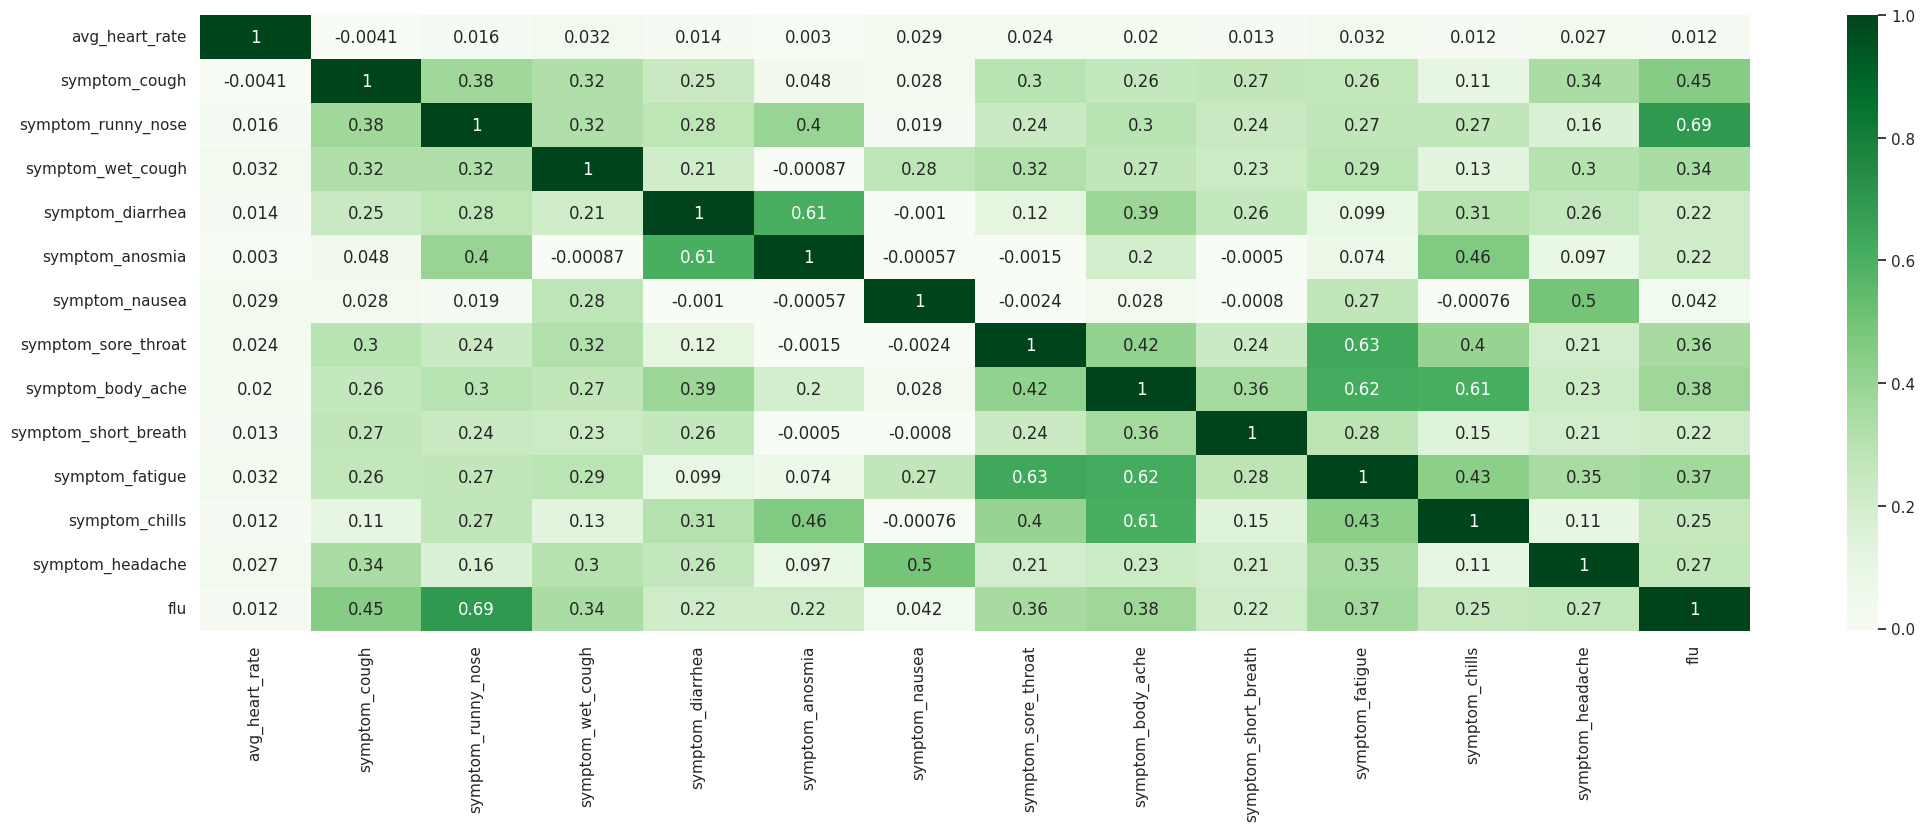

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25,8))
sns.heatmap(corr_matrix_df,
            xticklabels=input_cols,
            yticklabels=input_cols,  cmap="Greens", annot=True)

In [ ]:
symptoms_agg = fd.groupBy('device_name', year('ddate').alias('Year')).agg(mean('avg_heart_rate').alias('heart_rate'),\
        sum('symptom_fever').alias('symptom_fever'),\
        sum('symptom_fever_guess').alias('symptom_fever_guess'),\
        sum('symptom_anosmia').alias('symptom_anosmia'),\
        sum('symptom_body_ache').alias('symptom_body_ache'),\
        sum('symptom_chills').alias('symptom_chills'),\
        sum('symptom_cough').alias('symptom_cough'),\
        sum('symptom_diarrhea').alias('symptom_diarrhea'),\
        sum('symptom_fatigue').alias('symptom_fatigue'),\
        sum('symptom_headache').alias('symptom_headache'),\
        sum('symptom_nausea').alias('symptom_nausea'),\
        sum('symptom_runny_nose').alias('symptom_runny_nose'),\
        sum('symptom_short_breath').alias('symptom_short_breath'),\
        sum('symptom_sore_throat').alias('symptom_sore_throat'),\
        sum('symptom_wet_cough').alias('symptom_wet_cough'),\
        sum('flu').alias('flu'))\
       .orderBy('Year')

In [ ]:
# Convert all columns to DoubleType to filter large values
#for col in symptoms_agg.columns:
#    ns = symptoms_agg.withColumn(col, symptoms_agg[col].cast(DoubleType()))
ns = symptoms_agg
ns.printSchema()

root
 |-- device_name: string (nullable = false)
 |-- Year: integer (nullable = true)
 |-- heart_rate: double (nullable = true)
 |-- symptom_fever: long (nullable = true)
 |-- symptom_fever_guess: long (nullable = true)
 |-- symptom_anosmia: long (nullable = true)
 |-- symptom_body_ache: long (nullable = true)
 |-- symptom_chills: long (nullable = true)
 |-- symptom_cough: long (nullable = true)
 |-- symptom_diarrhea: long (nullable = true)
 |-- symptom_fatigue: long (nullable = true)
 |-- symptom_headache: long (nullable = true)
 |-- symptom_nausea: long (nullable = true)
 |-- symptom_runny_nose: long (nullable = true)
 |-- symptom_short_breath: long (nullable = true)
 |-- symptom_sore_throat: long (nullable = true)
 |-- symptom_wet_cough: long (nullable = true)
 |-- flu: long (nullable = true)



In [ ]:
ns = ns.toPandas()
ns

,device_name,Year,heart_rate,symptom_fever,symptom_fever_guess,symptom_anosmia,symptom_body_ache,symptom_chills,symptom_cough,symptom_diarrhea,symptom_fatigue,symptom_headache,symptom_nausea,symptom_runny_nose,symptom_short_breath,symptom_sore_throat,symptom_wet_cough,flu
0,fitbit,2020,58.946953,0.0,NaN,0,15,3,16,3,35,23,5,25,7,27,1,11
1,garmin,2020,43.995789,0.0,NaN,0,1,0,0,0,1,0,0,0,0,1,0,0
2,apple,2020,57.550000,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
3,fitbit,2021,56.200337,0.0,NaN,3,13,2,8,8,12,8,3,41,0,14,14,15
4,garmin,2021,48.660215,0.0,NaN,0,5,1,2,0,5,5,0,2,0,2,0,1
5,garmin,2022,42.946903,0.0,NaN,0,1,0,4,3,1,3,0,1,3,3,2,1
6,apple,2022,61.615385,NaN,NaN,0,0,0,1,2,0,1,0,0,0,0,1,0
7,fitbit,2022,54.797695,0.0,NaN,0,1,1,10,0,4,0,0,27,0,15,1,9
8,garmin,2023,50.000000,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0
9,fitbit,2023,54.808824,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0


# Feature Importance

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

# Load data
data = fd

# Split data into training and test sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=123)

# Define the input columns
input_cols = ["avg_heart_rate","symptom_cough","symptom_runny_nose", "symptom_wet_cough", 'symptom_diarrhea',"symptom_anosmia","symptom_nausea", "symptom_sore_throat", "symptom_body_ache", "symptom_short_breath", "symptom_fatigue", "symptom_chills", "symptom_headache"]

# Define the feature vector assembler
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")

# Create a Random Forest classifier
rf = RandomForestClassifier(labelCol="flu", featuresCol="features", numTrees=100, maxDepth=10, seed=123)

# Create a pipeline
pipeline = Pipeline(stages=[assembler, rf])

# Fit the pipeline to the training data
model = pipeline.fit(train_data)

# Get feature importance
importances = model.stages[-1].featureImportances

# Print feature importance
for i, col in enumerate(input_cols):
    print(col, importances[i])

# Create a DataFrame of feature importances

avg_heart_rate 0.03598392284705314
symptom_cough 0.14866915517483484
symptom_runny_nose 0.3457196128100502
symptom_wet_cough 0.041518340958689066
symptom_diarrhea 0.01730575962574186
symptom_anosmia 0.0026810448500260656
symptom_nausea 0.002839185559220776
symptom_sore_throat 0.09972194279160675
symptom_body_ache 0.13723343512436248
symptom_short_breath 0.008502654652516824
symptom_fatigue 0.10594649252464164
symptom_chills 0.006261492025882954
symptom_headache 0.04761696105537342


In [ ]:
importances = importances.toArray().tolist()
df_feature_importances = pd.DataFrame({'Feature': input_cols, 'Importance': importances})
df_feature_importances = df_feature_importances.sort_values(by='Importance', ascending=False)
df_feature_importances


,Feature,Importance
2,symptom_runny_nose,0.345720
1,symptom_cough,0.148669
8,symptom_body_ache,0.137233
10,symptom_fatigue,0.105946
7,symptom_sore_throat,0.099722
12,symptom_headache,0.047617
3,symptom_wet_cough,0.041518
0,avg_heart_rate,0.035984
4,symptom_diarrhea,0.017306
9,symptom_short_breath,0.008503


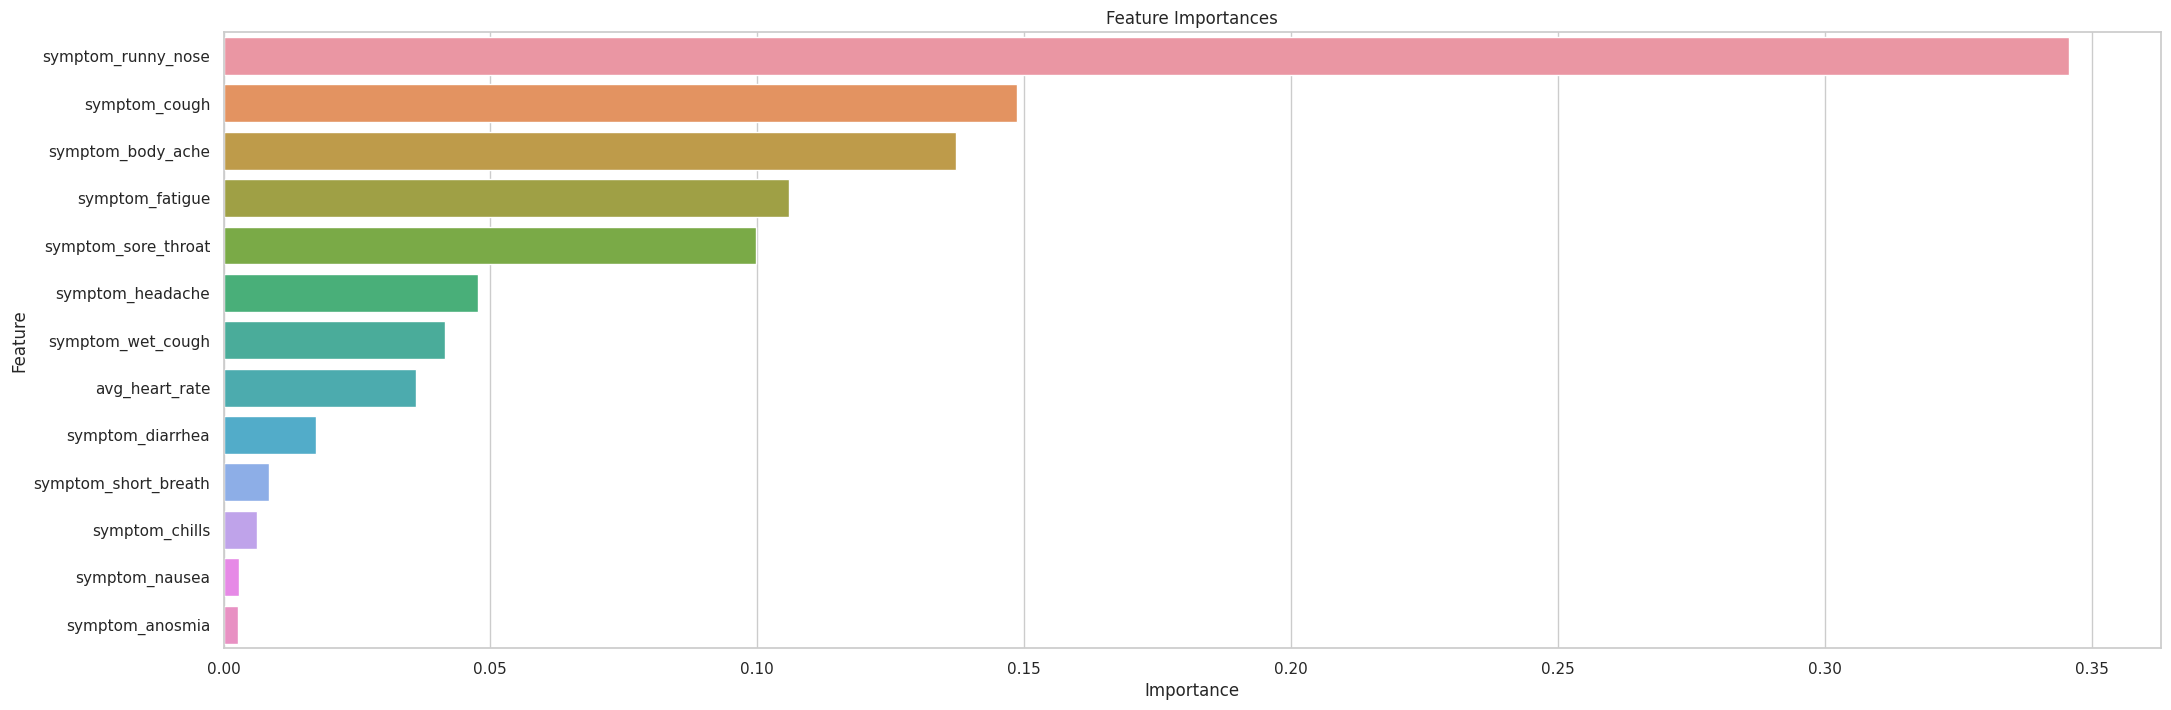

In [ ]:
# Sort the DataFrame by feature importances
#df_feature_importances = df_feature_importances.sort_values(by=['Importance'])

plt.figure(figsize=(25,8))

# Create a bar plot of the feature importances
sns.barplot(x='Importance', y='Feature', data=df_feature_importances)

# Set the title of the plot
plt.title('Feature Importances')

# Show the plot
plt.show()

# Model Building

In [ ]:
data = fd

#.select([col for col in fd.columns if col not in ["ddate","device_name", "member"]])

data.printSchema()

In [ ]:
# Replace NaN and Infinity values with null
data = data.replace(float('nan'), None)\
       .replace(float('inf'), None)\
       .replace(float('-inf'), None)


In [ ]:
# Drop the "symptom_fever_guess" column
data = data.drop("symptom_fever_guess")

data = data.drop("symptom_fever")

data.dropna()

In [ ]:
data.show(3)

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier, GBTClassifier, NaiveBayes, LogisticRegression, DecisionTreeClassifier
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator

# Load a DataFrame from a CSV file
df = data

df.printSchema()

# Split the data into training and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)

# Define the input columns
#input_cols = ["avg_heart_rate","symptom_cough", "symptom_sore_throat", "symptom_body_ache", "symptom_runny_nose", "symptom_chills", "symptom_fatigue", "symptom_headache"]

input_cols = ["avg_heart_rate","symptom_runny_nose"]

#input_cols = ["avg_heart_rate"]

# Define the classifiers to use
rf = RandomForestClassifier(labelCol="flu", featuresCol="features_rf", seed=123)
gbt = GBTClassifier(labelCol="flu", featuresCol="features_gbt", seed=123)
nb = NaiveBayes(labelCol="flu", featuresCol="features_nb")
lr = LogisticRegression(labelCol="flu", featuresCol="features_lr")
dt = DecisionTreeClassifier(labelCol="flu", featuresCol="features_dt", seed=123)

# Define the feature vector assembler
assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
assembler_rf = VectorAssembler(inputCols=input_cols, outputCol="features_rf")
assembler_gbt = VectorAssembler(inputCols=input_cols, outputCol="features_gbt")
assembler_nb = VectorAssembler(inputCols=input_cols, outputCol="features_nb")
assembler_lr = VectorAssembler(inputCols=input_cols, outputCol="features_lr")
assembler_dt = VectorAssembler(inputCols=input_cols, outputCol="features_dt")

In [ ]:
df.summary("count").show()

In [ ]:
df.groupBy("flu").count().show()

In [ ]:
# Get the counts of the two classes
train_data.groupBy("flu").count().show()

In [ ]:
# assume df is the PySpark DataFrame containing the imbalanced data
# count the number of instances in the minority class
minority_count = train_data.filter(train_data['flu'] == 1).count()

# randomly sample a subset of the majority class
majority_sampled = train_data.filter(train_data['flu'] == 0).orderBy(rand()).limit(minority_count)

# combine minority class and the sampled majority class
train_data = train_data.filter(train_data['flu'] == 1).union(majority_sampled)

# check if the classes are now balanced
train_data.groupBy('flu').count().show()

In [ ]:
# Create the pipelines for each classifier
pipeline_rf = Pipeline(stages=[assembler_rf, rf])
pipeline_gbt = Pipeline(stages=[assembler_gbt, gbt])
pipeline_nb = Pipeline(stages=[assembler_nb, nb])
pipeline_lr = Pipeline(stages=[assembler_lr, lr])
pipeline_dt = Pipeline(stages=[assembler_dt, dt])

In [ ]:
# Train each classifier on the training data
model_rf = pipeline_rf.fit(train_data)
model_gbt = pipeline_gbt.fit(train_data)
model_nb = pipeline_nb.fit(train_data)
model_lr = pipeline_lr.fit(train_data)
model_dt = pipeline_dt.fit(train_data)

In [ ]:
# Make predictions on the test data
predictions_rf = model_rf.transform(test_data)
predictions_gbt = model_gbt.transform(test_data)
predictions_nb = model_nb.transform(test_data)
predictions_lr = model_lr.transform(test_data)
predictions_dt = model_dt.transform(test_data)

In [ ]:
# Calculate and print the confusion matrix
cm = confusion_matrix(test_data)
print("Confusion Matrix:\n", cm)

# Calculate and print the accuracy, precision, recall, and F1 score
accuracy = accuracy_score(test_data)
precision = precision_score(test_data)
recall = recall_score(test_data)
f1 = f1_score(test_data)
auroc = roc_auc_score(test_data)

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="flu", rawPredictionCol="prediction")

#ROCs
roc = evaluator.evaluate(predictions_rf)
roc1 = evaluator.evaluate(predictions_gbt)
roc2 = evaluator.evaluate(predictions_nb)
roc3 = evaluator.evaluate(predictions_lr)
roc4 = evaluator.evaluate(predictions_dt)

#Evaluate the area under the precision-recall curve
pr_rf = evaluator.evaluate(predictions_rf, {evaluator.metricName: "areaUnderPR"})
pr_gbt = evaluator.evaluate(predictions_gbt, {evaluator.metricName: "areaUnderPR"})
pr_nb = evaluator.evaluate(predictions_nb, {evaluator.metricName: "areaUnderPR"})
pr_lr = evaluator.evaluate(predictions_lr, {evaluator.metricName: "areaUnderPR"})
pr_dt = evaluator.evaluate(predictions_dt, {evaluator.metricName: "areaUnderPR"})

In [ ]:
# 0.6470588235294118 0.6470588235294118 0.6470588235294118 0.6470588235294118 0.6470588235294118
# 0.6750919117647058 0.690716911764706 0.6470588235294118 0.6277573529411764 0.690716911764706

# heart_rate only
#0.5909926470588235 0.6011029411764706 0.5 0.5404411764705883 0.5909926470588235

# heart_rate & runny_nose
#0.7925552922590838 0.7925552922590838 0.8333333333333333 0.8333333333333333 0.7883096366508688

# ROC curve
print(roc, roc1, roc2, roc3, roc4)

In [ ]:
# 0.6524886877828053 0.6524886877828053 0.6524886877828053 0.6524886877828053 0.6524886877828053
# 0.0298371582626602 0.0369596611148551 0.6524886877828053 0.032441138124089275 0.0369596611148551

# heart_rate only
# 0.019285423763282322 0.01985703980588891 0.015384615384615385 0.017297628057519204 0.019285423763282322

# heart_rate & runny_nose
# 0.10202492334592164 0.10202492334592164 0.83704046957059 0.83704046957059 0.12382725635737685

# Precision-recall curve
print(pr_rf, pr_gbt, pr_nb, pr_lr, pr_dt)

#Model Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Features and Target

In [ ]:
data = fd

In [ ]:
# Replace NaN and Infinity values with null
data = data.replace(float('nan'), None)\
       .replace(float('inf'), None)\
       .replace(float('-inf'), None)

In [ ]:
# Drop the "symptom_fever_guess" column
data = data.drop("symptom_fever_guess")
data = data.drop("symptom_fever")

# Drop rows with 0 in column 'pandas_df'
#data = data[data['avg_heart_rate'] != 0]

data.dropna()

DataFrame[ddate: date, member: string, device_name: string, avg_heart_rate: int, symptom_anosmia: int, symptom_body_ache: int, symptom_chills: int, symptom_cough: int, symptom_diarrhea: int, symptom_fatigue: int, symptom_headache: int, symptom_nausea: int, symptom_runny_nose: int, symptom_short_breath: int, symptom_sore_throat: int, symptom_wet_cough: int, flu: int]

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.utils import resample

# Load a DataFrame from a CSV file
data_ml = data.toPandas()

# Define which columns to drop
columns_to_drop = ["ddate", "device_name", "member"]

# Drop the selected columns from the DataFrame
data_ml = data_ml.drop(columns_to_drop, axis=1)

In [ ]:
# separate the majority and minority classes
df_majority = data_ml[data_ml["flu"]==0]
df_minority = data_ml[data_ml["flu"]==1]

In [ ]:
data_ml['flu'].value_counts()

0    5041
1      37
Name: flu, dtype: int64

# DOWNSAMPLE DATASET

In [ ]:
# calculate the ratio between majority and minority classes
ratio = len(df_majority) / len(df_minority)

# check if the ratio is greater than 10
if ratio > 10:
    # downsample majority class to achieve a ratio of 10
    n_majority_samples = int(len(df_minority) * 10)
    majority_indices = np.random.choice(df_majority.index, size=n_majority_samples, replace=False)
    df_majority_downsampled = df_majority.loc[majority_indices]
else:
    df_majority_downsampled = df_majority

# combine majority class with downsampled minority class
data_ml= pd.concat([df_majority_downsampled, df_minority])

In [ ]:
data_ml['flu'].value_counts()

0    370
1     37
Name: flu, dtype: int64

# UPSAMPLE DATASET

In [ ]:
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=123) # reproducible results

# combine majority class with upsampled minority class
data_ml = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
print(len(df_majority), len(df_minority_upsampled))

# SPLITTING

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into target and features
target = data_ml["flu"]

features = data_ml.loc[:, ["avg_heart_rate", "symptom_runny_nose"]]
#features = data_ml.loc[:, ["avg_heart_rate", "symptom_sore_throat", "symptom_runny_nose"]]
#features = data_ml.loc[:, ["avg_heart_rate"]]

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123)

# Standardize the feature columns in X_train and X_test
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# UPSAMPLING TECHNIQUE_TRAIN

In [ ]:
# concatenate the training features and target into a single dataframe
train_data = pd.concat([X_train, y_train], axis=1)

# separate the majority and minority classes
df_majority = train_data[train_data["flu"]==0]
df_minority = train_data[train_data["flu"]==1]

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=123) # reproducible results

# combine majority class with upsampled minority class
train_resampled = pd.concat([df_majority, df_minority_upsampled])

# separate resampled features and target
X_train = train_resampled.drop(columns=["flu"])
y_train = train_resampled["flu"]

In [ ]:
y_test.count()

1619

# DOWNSAMPLING TECHNIQUE_TRAIN

In [ ]:
# concatenate the training features and target into a single dataframe
train_data = pd.concat([X_train, y_train], axis=1)

# separate the majority and minority classes
df_majority = train_data[train_data["flu"]==0]
df_minority = train_data[train_data["flu"]==1]

# calculate the ratio between majority and minority classes
ratio = len(df_majority) / len(df_minority)

print(ratio)

# check if the ratio is greater than 10
if ratio > 10:
    # downsample majority class to achieve a ratio of 10
    n_majority_samples = int(len(df_minority) * 2)
    majority_indices = np.random.choice(df_majority.index, size=n_majority_samples, replace=False)
    df_majority_downsampled = df_majority.loc[majority_indices]
else:
    df_majority_downsampled = df_majority

# combine majority class with downsampled minority class
train_resampled = pd.concat([df_majority_downsampled, df_minority])

# separate resampled features and target
X_train = train_resampled.drop(columns=["flu"])
y_train = train_resampled["flu"]

125.9375


In [ ]:
len(df_majority_downsampled)

64

In [ ]:
len(df_minority)

32

In [ ]:
len(X_train)

96

In [ ]:
y_test.value_counts()

0    1011
1       5
Name: flu, dtype: int64

# SMOTE_IT_UP

Mean nb ROC AUC: 0.993


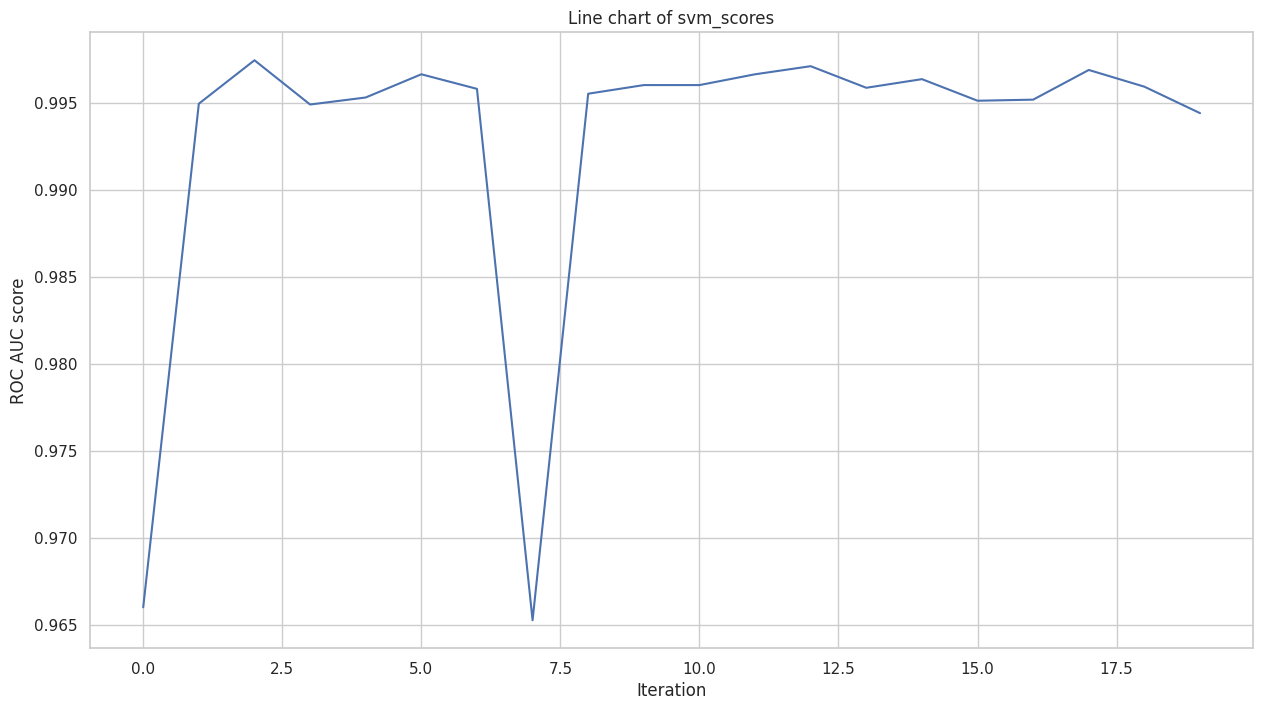

In [ ]:
# combined SMOTE and Edited Nearest Neighbors resampling for imbalanced classification
from numpy import mean
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

over = SMOTE(sampling_strategy=0.2)
under = RandomUnderSampler(sampling_strategy=0.6)

nb_clf = GaussianNB()
svc_clf = SVC(probability=True, random_state=123)
dt_clf = DecisionTreeClassifier(max_depth=2, random_state=123)
#gb_clf = GradientBoostingClassifier(random_state=123)

nb_steps = [('o', over), ('u', under), ('m', nb_clf)]
svm_steps = [('o', over), ('u', under), ('m', svc_clf)]
dt_steps = [('o', over), ('u', under), ('m', dt_clf)]
#gb_steps = [('o', over), ('u', under), ('m', model)]
#ad_steps = [('o', over), ('u', under), ('m', model)]
#rf_steps = [('o', over), ('u', under), ('m', model)]
#vc_steps = [('o', over), ('u', under), ('m', model)]
#rfc_steps = [('o', over), ('u', under), ('m', model)]

nb_pipeline = Pipeline(steps=nb_steps)
svm_pipeline = Pipeline(steps=svm_steps)
dt_pipeline = Pipeline(steps=dt_steps)
#gb_pipeline = Pipeline(steps=gb_steps)
#ad_pipeline = Pipeline(steps=ad_steps)
#rf_pipeline = Pipeline(steps=rf_steps)
#vc_pipeline = Pipeline(steps=vc_steps)
#rfc_pipeline = Pipeline(steps=rfc_steps)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=10, random_state=1)

# evaluate model
#nb_scores = cross_val_score(_pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
dt_scores = cross_val_score(dt_pipeline, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean nb ROC AUC: %.3f' % mean(dt_scores))

import matplotlib.pyplot as plt

# create x-axis values
x_values = range(len(dt_scores))

plt.figure(figsize=(15,8))

# plot nb_scores as a line chart
plt.plot(x_values, dt_scores)
plt.title('Line chart of svm_scores')
plt.xlabel('Iteration')
plt.ylabel('ROC AUC score')
plt.show()

# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Standardize the training set features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Standardize the test set features
X_test_std = scaler.transform(X_test)

# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Navie Bayes - 0.91089

In [ ]:
# Create individual classifiers
nb_clf = GaussianNB()

nb_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = nb_clf.predict(X_test)

# Calculate and print the confusion matrix
nb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", nb_cm)

n_tn, n_fp, n_fn, n_tp = nb_cm.ravel()

print("True negatives: ", n_tn)
print("False positives: ", n_fp)
print("False negatives: ", n_fn)
print("True positives: ", n_tp)

#Selectivity = TN / (TN + FP)
n_sel = n_tn / (n_tn + n_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)
nb_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", nb_accuracy)
print("Precision: ", nb_precision)
print("Recall: ", nb_recall)
print("F1 Score: ", nb_f1)
print("AUC-ROC: ", nb_auroc)

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


```
#20
Confusion Matrix:
 [[1004    7]
 [   0    5]]
True negatives:  1004
False positives:  7
False negatives:  0
True positives:  5
Accuracy:  0.9931102362204725
Precision:  0.4166666666666667
Recall:  1.0
F1 Score:  0.5882352941176471
AUC-ROC:  0.996538081107814

#30
Confusion Matrix:
 [[1505    9]
 [   0   10]]
True negatives:  1505
False positives:  9
False negatives:  0
True positives:  10
Accuracy:  0.9940944881889764
Precision:  0.5263157894736842
Recall:  1.0
F1 Score:  0.6896551724137931
AUC-ROC:  0.9970277410832232

#40
Confusion Matrix:
 [[2003   13]
 [   0   16]]
True negatives:  2003
False positives:  13
False negatives:  0
True positives:  16
Accuracy:  0.9936023622047244
Precision:  0.5517241379310345
Recall:  1.0
F1 Score:  0.7111111111111111
AUC-ROC:  0.9967757936507937

#50
Confusion Matrix:
 [[2501   15]
 [   0   23]]
True negatives:  2501
False positives:  15
False negatives:  0
True positives:  23
Accuracy:  0.9940921622686096
Precision:  0.6052631578947368
Recall:  1.0
F1 Score:  0.7540983606557378
AUC-ROC:  0.9970190779014309
```



# SVM -  0.7326

In [ ]:
# Create individual classifiers
svc_clf = SVC(probability=True, random_state=123)

# Standardize the training set features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Standardize the test set features
X_test_std = scaler.transform(X_test)

svc_clf.fit(X_train_std, y_train)

# Make predictions on the test data
y_pred = svc_clf.predict(X_test_std)

# Calculate and print the confusion matrix
svc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", svc_cm)

s_tn, s_fp, s_fn, s_tp = svc_cm.ravel()

print("True negatives: ", s_tn)
print("False positives: ", s_fp)
print("False negatives: ", s_fn)
print("True positives: ", s_tp)

#Selectivity = TN / (TN + FP)
s_sel = s_tn / (s_tn + s_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
svc_accuracy = accuracy_score(y_test, y_pred)
svc_precision = precision_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_f1 = f1_score(y_test, y_pred)
svc_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", svc_accuracy)
print("Precision: ", svc_precision)
print("Recall: ", svc_recall)
print("F1 Score: ", svc_f1)
print("AUC-ROC: ", svc_auroc)

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


```
#20
Confusion Matrix:
 [[1004    7]
 [   0    5]]
True negatives:  1004
False positives:  7
False negatives:  0
True positives:  5
Accuracy:  0.9931102362204725
Precision:  0.4166666666666667
Recall:  1.0
F1 Score:  0.5882352941176471
AUC-ROC:  0.996538081107814

#40
Confusion Matrix:
 [[1959   57]
 [   0   16]]
True negatives:  1959
False positives:  57
False negatives:  0
True positives:  16
Accuracy:  0.9719488188976378
Precision:  0.2191780821917808
Recall:  1.0
F1 Score:  0.3595505617977528
AUC-ROC:  0.9858630952380952

#50
Confusion Matrix:
 [[2501   15]
 [   2   21]]
True negatives:  2501
False positives:  15
False negatives:  2
True positives:  21
Accuracy:  0.993304450571091
Precision:  0.5833333333333334
Recall:  0.9130434782608695
F1 Score:  0.7118644067796611
AUC-ROC:  0.9535408170318657
```

# Decision Tree - 0.89108

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732
Training Accuracy: 1.0
Test Accuracy: 0.9921259842519685


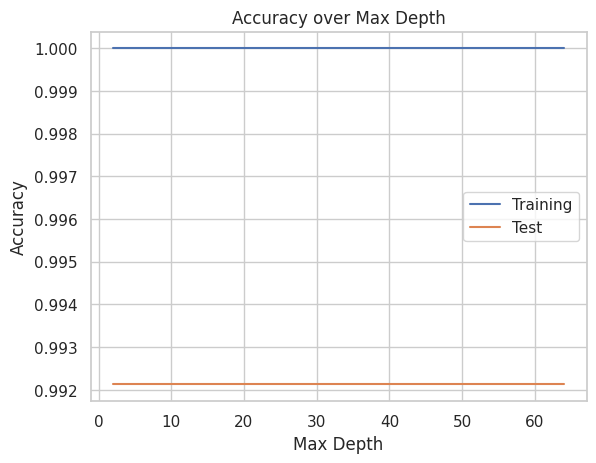

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# Train a decision tree classifier on the training set with different max depths
max_depths = [2, 4, 6, 8, 10, 12, 14, 16, 32, 64]
train_scores = []
test_scores = []

for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_clf.fit(X_train, y_train)

    # Estimate the training accuracy using cross-validation
    cv_scores = cross_val_score(dt_clf, X_train, y_train, cv=10)
    train_acc = np.mean(cv_scores)

    # Estimate the test accuracy using the trained model
    test_acc = dt_clf.score(X_test, y_test)

    train_scores.append(train_acc)
    test_scores.append(test_acc)


# Make predictions on the test data
y_pred = dt_clf.predict(X_test)

# Calculate and print the confusion matrix
dt_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", dt_cm)

d_tn, d_fp, d_fn, d_tp = dt_cm.ravel()

print("True negatives: ", d_tn)
print("False positives: ", d_fp)
print("False negatives: ", d_fn)
print("True positives: ", d_tp)

#Selectivity = TN / (TN + FP)
d_sel = d_tn / (d_tn + d_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)
dt_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", dt_accuracy)
print("Precision: ", dt_precision)
print("Recall: ", dt_recall)
print("F1 Score: ", dt_f1)
print("AUC-ROC: ", dt_auroc)


# Print the estimated training and test accuracies
print('Training Accuracy:', train_acc)
print('Test Accuracy:', test_acc)

# Plot the training and test accuracy over max depths
plt.plot(max_depths, train_scores, label='Training')
plt.plot(max_depths, test_scores, label='Test')
plt.title('Accuracy over Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


```
#20
Confusion Matrix:
 [[1004    7]
 [   0    5]]
True negatives:  1004
False positives:  7
False negatives:  0
True positives:  5
Accuracy:  0.9931102362204725
Precision:  0.4166666666666667
Recall:  1.0
F1 Score:  0.5882352941176471
AUC-ROC:  0.996538081107814
Training Accuracy: 1.0
Test Accuracy: 0.9931102362204725

#30
Confusion Matrix:
 [[1505    9]
 [   1    9]]
True negatives:  1505
False positives:  9
False negatives:  1
True positives:  9
Accuracy:  0.9934383202099738
Precision:  0.5
Recall:  0.9
F1 Score:  0.6428571428571429
AUC-ROC:  0.9470277410832232
Training Accuracy: 0.9263888888888889
Test Accuracy: 0.9934383202099738

#40
Confusion Matrix:
 [[2003   13]
 [   0   16]]
True negatives:  2003
False positives:  13
False negatives:  0
True positives:  16
Accuracy:  0.9936023622047244
Precision:  0.5517241379310345
Recall:  1.0
F1 Score:  0.7111111111111111
AUC-ROC:  0.9967757936507937
Training Accuracy: 1.0
Test Accuracy: 0.9936023622047244
```

# Gradient Boost - 0.90099

In [ ]:
# Create individual classifiers
gb_clf = GradientBoostingClassifier(random_state=64)

gb_clf.fit(X_train, y_train)

y_pred = ''

# Make predictions on the test data
y_pred = gb_clf.predict(X_test)

# Calculate and print the confusion matrix
gb_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", gb_cm)

g_tn, g_fp, g_fn, g_tp =gb_cm.ravel()

print("True negatives: ", g_tn)
print("False positives: ", g_fp)
print("False negatives: ", g_fn)
print("True positives: ", g_tp)

#Selectivity = TN / (TN + FP)
g_sel = g_tn / (g_tn + g_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
gb_accuracy = accuracy_score(y_test, y_pred)
gb_precision = precision_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred)
gb_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", gb_accuracy)
print("Precision: ", gb_precision)
print("Recall: ", gb_recall)
print("F1 Score: ", gb_f1)
print("AUC-ROC: ", gb_auroc)

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


```
#20
Confusion Matrix:
 [[1004    7]
 [   0    5]]
True negatives:  1004
False positives:  7
False negatives:  0
True positives:  5
Accuracy:  0.9931102362204725
Precision:  0.4166666666666667
Recall:  1.0
F1 Score:  0.5882352941176471
AUC-ROC:  0.996538081107814
```

# Random Forest - 0.90099

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [6, 12, 24],
    'max_depth': [3, 6, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the classifier
rf_clf = RandomForestClassifier(random_state=42)

# Define the scoring metric
scorer = make_scorer(accuracy_score)

# Perform grid search
grid_search = GridSearchCV(rf_clf, param_grid, scoring=scorer)
grid_search.fit(X_train, y_train)

# Create individual classifiers
#rf_clf = RandomForestClassifier(random_state=42)

#rf_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate and print the confusion matrix
rf_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", rf_cm)

r_tn, r_fp, r_fn, r_tp = rf_cm.ravel()

print("True negatives: ", r_tn)
print("False positives: ", r_fp)
print("False negatives: ", r_fn)
print("True positives: ", r_tp)

#Selectivity = TN / (TN + FP)
r_sel = r_tn / (r_tn + r_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)
rf_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", rf_accuracy)
print("Precision: ", rf_precision)
print("Recall: ", rf_recall)
print("F1 Score: ", rf_f1)
print("AUC-ROC: ", rf_auroc)

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


# Ensemble Learning - 0.90099

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Create individual classifiers
#dt_clf = DecisionTreeClassifier(random_state=42)
#rf_clf = RandomForestClassifier(random_state=42)
#svc_clf = SVC(probability=True, random_state=42)
#nb_clf = GaussianNB()
#gb_clf = GradientBoostingClassifier(random_state=42)

# Create an ensemble voting classifier
voting_clf = VotingClassifier(estimators=[('dt', dt_clf), ('rf', rf_clf), ('svc', svc_clf), ('nb', nb_clf), ('gb', gb_clf)], voting='hard')

# Fit the ensemble classifier on the data
voting_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = voting_clf.predict(X_test)

# Calculate and print the confusion matrix
vc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", vc_cm)

e_tn, e_fp, e_fn, e_tp = vc_cm.ravel()

print("True negatives: ", e_tn)
print("False positives: ", e_fp)
print("False negatives: ", e_fn)
print("True positives: ", e_tp)

#Selectivity = TN / (TN + FP)
e_sel = e_tn / (e_tn + e_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
vc_accuracy = accuracy_score(y_test, y_pred)
vc_precision = precision_score(y_test, y_pred)
vc_recall = recall_score(y_test, y_pred)
vc_f1 = f1_score(y_test, y_pred)
vc_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", vc_accuracy)
print("Precision: ", vc_precision)
print("Recall: ", vc_recall)
print("F1 Score: ", vc_f1)
print("AUC-ROC: ", vc_auroc)

#HR and runnynose

#Confusion Matrix:
# [[2118    0]
# [  13   28]]
#Accuracy:  0.9939786938397406
#Precision:  1.0
#Recall:  0.6829268292682927
#F1 Score:  0.8115942028985507
#AUC-ROC:  0.8414634146341464

#Heart rate only after balancing
#Confusion Matrix:
# [[ 997 1121]
# [  12   29]]
#Accuracy:  0.47522000926354796
#Precision:  0.025217391304347827
#Recall:  0.7073170731707317
#F1 Score:  0.04869857262804366
#AUC-ROC:  0.5890220871047237

# heart_rate & runny_nose after balancing
# Confusion Matrix:
# [[2056   49]
# [  20   34]]
# Accuracy:  0.968040759610931
# Precision:  0.40963855421686746
# Recall:  0.6296296296296297
# F1 Score:  0.49635036496350377
# AUC-ROC:  0.8031758599454563


Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


# AdaBoosting[Decision Tree] - 0.91089

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# create an AdaBoost classifier with a decision tree as the base estimator
adaboost_clf = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=2, random_state=512)

# fit the classifier on the training data
adaboost_clf.fit(X_train, y_train)

# predict the test data
y_pred = adaboost_clf.predict(X_test)

# Calculate and print the confusion matrix
ad_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", ad_cm)

a_tn, a_fp, a_fn, a_tp = ad_cm.ravel()

print("True negatives: ", a_tn)
print("False positives: ", a_fp)
print("False negatives: ", a_fn)
print("True positives: ", a_tp)

#Selectivity = TN / (TN + FP)
a_sel = a_tn / (a_tn + a_fp)

# Calculate and print the accuracy, precision, recall, and F1 score
ad_accuracy = accuracy_score(y_test, y_pred)
ad_precision = precision_score(y_test, y_pred)
ad_recall = recall_score(y_test, y_pred)
ad_f1 = f1_score(y_test, y_pred)
ad_auroc = roc_auc_score(y_test, y_pred)

# Evaluate the performance of the ensemble classifier
print("Accuracy: ", ad_accuracy)
print("Precision: ", ad_precision)
print("Recall: ", ad_recall)
print("F1 Score: ", ad_f1)
print("AUC-ROC: ", ad_auroc)

#Confusion Matrix:
# [[2118    0]
# [  13   28]]
#Accuracy:  0.9939786938397406
#Precision:  1.0
#Recall:  0.6829268292682927
#F1 Score:  0.8115942028985507
#AUC-ROC:  0.8414634146341464

# Heart rate only after balancing
# Confusion Matrix:
# [[ 436 1682]
# [   1   40]]
# Accuracy:  0.2204724409448819
# Precision:  0.023228803716608595
# Recall:  0.975609756097561
# F1 Score:  0.04537719795802609
# AUC-ROC:  0.5907321679449089

# Heart rate & runny_nose after balancing
# Confusion Matrix:
# [[2105    0]
# [  21   33]]
# Accuracy:  0.9902732746641963
# Precision:  1.0
# Recall:  0.6111111111111112
# F1 Score:  0.7586206896551725
# AUC-ROC:  0.8055555555555556

Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy:  0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


# PCA & RF - 0.90099

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Perform PCA to reduce the dimensionality of the data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(pca)

# Train a Random Forest Classifier on the transformed data
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_pca, y_train)

# Make predictions on the testing set and calculate accuracy
y_pred = rfc.predict(X_test_pca)

# Calculate and print the confusion matrix
rfc_cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", rfc_cm)

rc_tn, rc_fp, rc_fn, rc_tp = rfc_cm.ravel()

print("True negatives: ", rc_tn)
print("False positives: ", rc_fp)
print("False negatives: ", rc_fn)
print("True positives: ", rc_tp)

#Selectivity = TN / (TN + FP)
rc_sel = rc_tn / (rc_tn + rc_fp)

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_precision = precision_score(y_test, y_pred)
rfc_recall = recall_score(y_test, y_pred)
rfc_f1 = f1_score(y_test, y_pred)
rfc_auroc = roc_auc_score(y_test, y_pred)

print("Accuracy:", rfc_accuracy)
print("Precision: ", rfc_precision)
print("Recall: ", rfc_recall)
print("F1 Score: ", rfc_f1)
print("AUC-ROC: ",rfc_auroc)

#all features

# PCA(n_components=8)
# Confusion Matrix:
# [[1586    0]
# [   1   32]]
# Accuracy: 0.9993823347745522
# Precision:  1.0
# Recall:  0.9696969696969697
# F1 Score:  0.9846153846153847
# AUC-ROC:  0.9848484848484849

# runnynose and avg_heart_rate

# PCA(n_components=2)
# Confusion Matrix:
# [[1586    0]
# [  12   21]]
# Accuracy: 0.9925880172946263
# Precision:  1.0
# Recall:  0.6363636363636364
# F1 Score:  0.7777777777777778
# AUC-ROC:  0.8181818181818181



PCA(n_components=2)
Confusion Matrix:
 [[1003    8]
 [   0    5]]
True negatives:  1003
False positives:  8
False negatives:  0
True positives:  5
Accuracy: 0.9921259842519685
Precision:  0.38461538461538464
Recall:  1.0
F1 Score:  0.5555555555555556
AUC-ROC:  0.9960435212660732


# -------------------------------------------- FEDERATED APPROACH --------------------------------------------------------

# remove

In [ ]:
# Class balancing
pos_df = fld[fld['flu'] == 1]
neg_df = fld[fld['flu'] == 0]

# calculate the ratio between majority and minority classes
ratio = len(neg_df) / len(pos_df)

#print(int(ratio))

# check if the ratio is greater than 10
if ratio > 10:
    # downsample majority class to achieve a ratio of 10
    n_majority_samples = int(len(pos_df) * 1)
    majority_indices = np.random.choice(neg_df.index, size=n_majority_samples, replace=False)
    df_majority_downsampled = neg_df.loc[majority_indices]
else:
    df_majority_downsampled = neg_df

# combine majority class with downsampled minority class
balanced_fld = pd.concat([df_majority_downsampled, pos_df])

# Federated Dataset

In [ ]:
import tensorflow_federated as tff
import tensorflow as tf
print(tf.__version__)
print(tff.__version__)
!python --version

2.12.0
0.56.0
Python 3.9.16


In [ ]:
pandas_df = data.toPandas()

In [ ]:
pandas_df['flu'].value_counts()

0    5041
1      37
Name: flu, dtype: int64

In [ ]:
pandas_df.shape

(5078, 17)

# TFF FINAL - 0.9908

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
import tensorflow as tf
import tensorflow_federated as tff
from tensorflow.keras.metrics import *

In [ ]:
fld = pandas_df.drop(['ddate','device_name'], axis=1)

Local class balancing

In [ ]:
def make_tf_dataset(dataframe, negative_ratio=None, batch_size=None):
    dataset = dataframe
    #m = dataset['member']

    #columns_to_drop = ["avg_heart_rate","symptom_cough", "symptom_sore_throat", "symptom_body_ache", "symptom_runny_nose", "symptom_chills", "symptom_fatigue", "symptom_headache"]
    #columns_to_drop = ["member","symptom_cough", "symptom_wet_cough", 'symptom_diarrhea',"symptom_anosmia","symptom_nausea", "symptom_sore_throat", "symptom_body_ache", "symptom_short_breath", "symptom_fatigue", "symptom_chills", "symptom_headache"]
    #columns_to_drop = ["member","symptom_cough", "symptom_wet_cough", 'symptom_diarrhea',"symptom_anosmia","symptom_nausea", "symptom_sore_throat", "symptom_body_ache", "symptom_short_breath", "symptom_fatigue", "symptom_chills", "symptom_headache"]
    #columns_to_drop = ["member", 'symptom_diarrhea',"symptom_anosmia", "symptom_nausea", "symptom_chills", "symptom_short_breath", "symptom_headache", "symptom_cough", "symptom_wet_cough"]
    #dataset = dataset.drop(columns_to_drop, axis=1)
    #dataset = dataframe.loc[:, ["avg_heart_rate", "symptom_sore_throat", "symptom_runny_nose", "flu"]]

    dataset = dataframe.loc[:, ["avg_heart_rate","symptom_runny_nose", "flu"]]

    # Class balancing
    pos_df = dataset[dataset['flu'] == 1]
    neg_df = dataset[dataset['flu'] == 0]

#    if negative_ratio:
#        print(negative_ratio)
#        neg_df = neg_df.iloc[random.sample(range(0, len(neg_df)), len(pos_df)*negative_ratio), :]

    if negative_ratio:
        print('from: ', [len(neg_df) , len(pos_df)])
        n_neg_samples = int(len(pos_df) * negative_ratio)
        neg_indices = np.random.choice(neg_df.index, size=n_neg_samples, replace=False)
        neg_df = neg_df.loc[neg_indices]
        print('to: ', [len(neg_df) , len(pos_df)])

    balanced_df = pd.concat([neg_df, pos_df], ignore_index=True, sort=False)

    y = balanced_df.pop('flu')

    # Dataset creation
    dataset = tf.data.Dataset.from_tensor_slices((balanced_df.values, y.to_frame().values))
    dataset = dataset.shuffle(2048, seed=123)

    if batch_size:
        dataset = dataset.batch(batch_size)

    return dataset

In [ ]:
# group by clientid and create a dictionary of dataframes
dfs = {clientid: df_group for clientid, df_group in fld.groupby("member")}

In [ ]:
import random

train_data, val_data = [], []


for client_data in [dfs[x] for x in dfs.keys()]:
  #print(client_data[client_data['flu'] == 1].shape[0])
  #client_data = client_data.drop(['device_name'], axis=1)

  train_df, val_df = train_test_split(client_data, test_size=0.2, random_state=256)

  # Scaling (Standardization actually hurts performance)
  scaler = MinMaxScaler()
  train_features = scaler.fit_transform(train_df.drop(['flu'], axis=1))
  val_features = scaler.transform(val_df.drop(['flu'], axis=1))

  #train_features = train_df.drop(['flu'], axis=1)
  #val_features = val_df.drop(['flu'], axis=1)

  train_df[train_df.columns.difference(['flu'])] = train_features
  val_df[val_df.columns.difference(['flu'])] = val_features

  train_data.append(make_tf_dataset(train_df, negative_ratio=10, batch_size=64))
  val_data.append(make_tf_dataset(val_df, batch_size=1))

from:  [16, 0]
to:  [0, 0]
from:  [83, 3]
to:  [30, 3]
from:  [16, 0]
to:  [0, 0]
from:  [124, 0]
to:  [0, 0]
from:  [493, 1]
to:  [10, 1]
from:  [224, 0]
to:  [0, 0]
from:  [527, 1]
to:  [10, 1]
from:  [155, 3]
to:  [30, 3]
from:  [285, 1]
to:  [10, 1]
from:  [786, 0]
to:  [0, 0]
from:  [462, 0]
to:  [0, 0]
from:  [16, 0]
to:  [0, 0]
from:  [31, 0]
to:  [0, 0]
from:  [811, 19]
to:  [190, 19]


In [ ]:
val_data

[<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>,
 <_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf

In [ ]:
def input_spec():
    return (
        tf.TensorSpec([None, 2], tf.float64),
        tf.TensorSpec([None, 1], tf.int32)
    )

def model_fn():
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(2,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])

    return tff.learning.models.from_keras_model(
        model,
        input_spec=input_spec(),
        loss=tf.keras.losses.BinaryCrossentropy(),
        metrics=[BinaryAccuracy(), Precision(), Recall(), FalsePositives(), FalseNegatives(), TruePositives(), TrueNegatives(), AUC()])

# **Training**

In [ ]:
EPOCHS = 100

trainer = tff.learning.algorithms.build_weighted_fed_avg(
    model_fn,
    client_optimizer_fn=lambda: tf.keras.optimizers.Adam(),
    server_optimizer_fn=lambda: tf.keras.optimizers.Adam()
)

state = trainer.initialize()
train_hist = []
for i in range(EPOCHS):
    state, metrics = trainer.next(state, train_data,)
    train_hist.append(metrics)
    print(f"\nRun {i+1} acc: {metrics['client_work']['train']['binary_accuracy']} precision: {metrics['client_work']['train']['precision']} recall: {metrics['client_work']['train']['recall']} loss: {metrics['client_work']['train']['loss']}", end="")


Run 1 acc: 0.7175324559211731 precision: 0.07246376574039459 recall: 0.1785714328289032 loss: 0.6946580410003662
Run 2 acc: 0.9253246784210205 precision: 0.6666666865348816 recall: 0.3571428656578064 loss: 0.6904786229133606
Run 3 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.687063455581665
Run 4 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6837595105171204
Run 5 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6805427074432373
Run 6 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6772282719612122
Run 7 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6736063957214355
Run 8 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6700083017349243
Run 9 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.6663399934768677
Run 10 acc: 0.9707792401313782 precision: 0.7567567825317383 recall: 1.0 loss: 0.662414669990539

# Metrics

In [ ]:
accs = []
for train_dict in train_hist:
    accuracy = train_dict['client_work']['train']['binary_accuracy']
    accs.append(accuracy)

In [ ]:
recalls = []
for train_dict in train_hist:
    recall = train_dict['client_work']['train']['recall']
    recalls.append(recall)

In [ ]:
aucs = []
for train_dict in train_hist:
    auc = train_dict['client_work']['train']['auc']
    aucs.append(auc)

In [ ]:
losses = []
for train_dict in train_hist:
    loss = train_dict['client_work']['train']['loss']
    losses.append(loss)

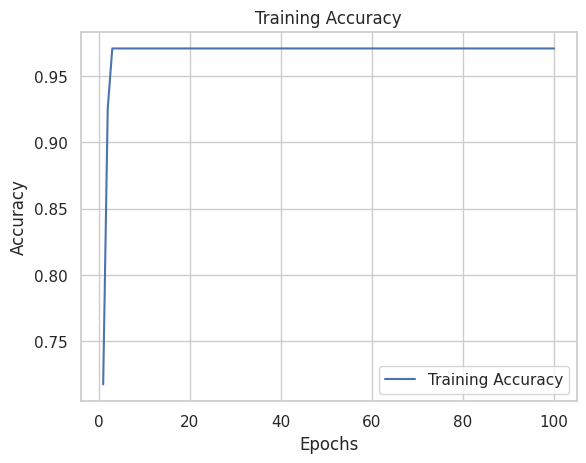

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(accs) + 1)

plt.plot(epochs, accs, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

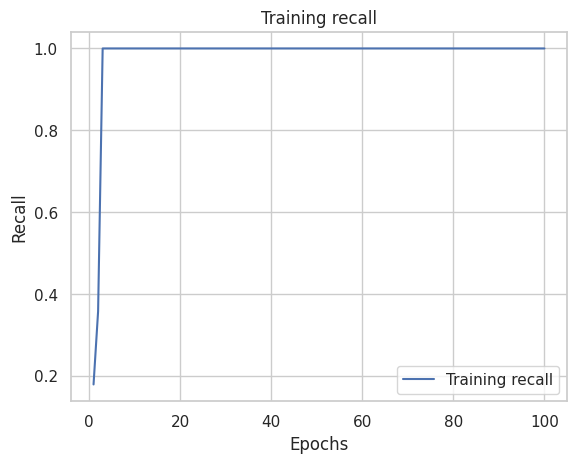

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(recalls) + 1)

plt.plot(epochs, recalls, 'b', label='Training recall')
plt.title('Training recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

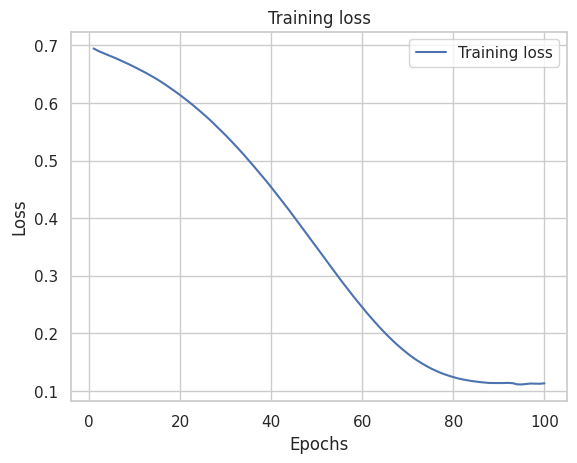

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(losses) + 1)

plt.plot(epochs, losses, 'b', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

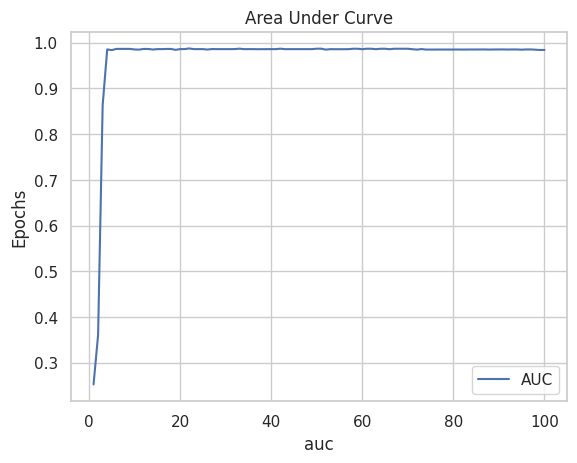

In [ ]:
epochs = range(1, len(aucs) + 1)

plt.plot(epochs, aucs, 'b', label='AUC')
plt.title('Area Under Curve')
plt.ylabel('Epochs')
plt.xlabel('auc')
plt.legend()
plt.show()

In [ ]:
evaluator = tff.learning.build_federated_evaluation(model_fn)

<ipython-input-388-f1e1ccb71f29>:1: DeprecationWarning: `tff.learning.build_federated_evaluation` is deprecated, use `tff.learning.algorithms.build_fed_eval` instead.
  evaluator = tff.learning.build_federated_evaluation(model_fn)


In [ ]:
federated_metrics = evaluator(state.global_model_weights, val_data)
federated_metrics

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.9941234),
                           ('precision', 0.6),
                           ('recall', 1.0),
                           ('false_positives', 6.0),
                           ('false_negatives', 0.0),
                           ('true_positives', 9.0),
                           ('true_negatives', 1006.0),
                           ('auc', 0.99835306),
                           ('loss', 0.021073932),
                           ('num_examples', 1021),
                           ('num_batches', 1021)]))])

---------------------0.2-------------------

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.9941234),
                           ('precision', 0.6),
                           ('recall', 1.0),
                           ('false_positives', 6.0),
                           ('false_negatives', 0.0),
                           ('true_positives', 9.0),
                           ('true_negatives', 1006.0),
                           ('auc', 0.9981884),
                           ('loss', 0.3649567),
                           ('num_examples', 1021),
                           ('num_batches', 1021)]))])

-------------------------------------------

-----------------------0.3--------------

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.99215174),
                           ('precision', 0.47826087),
                           ('recall', 1.0),
                           ('false_positives', 12.0),
                           ('false_negatives', 0.0),
                           ('true_positives', 11.0),
                           ('true_negatives', 1506.0),
                           ('auc', 0.9974548),
                           ('loss', 0.23318098),
                           ('num_examples', 1529),
                           ('num_batches', 1529)]))])

-------------------------------------

----------------------0.4------------

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.9906817),
                           ('precision', 0.44117647),
                           ('recall', 1.0),
                           ('false_positives', 19.0),
                           ('false_negatives', 0.0),
                           ('true_positives', 15.0),
                           ('true_negatives', 2005.0),
                           ('auc', 0.9968873),
                           ('loss', 0.07984806),
                           ('num_examples', 2039),
                           ('num_batches', 2039)]))])

------------------------------

-----------------------0.5--------------

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.9917355),
                           ('precision', 0.47368422),
                           ('recall', 0.94736844),
                           ('false_positives', 20.0),
                           ('false_negatives', 1.0),
                           ('true_positives', 18.0),
                           ('true_negatives', 2502.0),
                           ('auc', 0.9967862),
                           ('loss', 0.06047491),
                           ('num_examples', 2541),
                           ('num_batches', 2541)]))])

----------------------------------

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.98717946),
                           ('precision', 1.0),
                           ('recall', 0.36363637),
                           ('loss', 0.2743887),
                           ('num_examples', 546),
                           ('num_batches', 546)]))])

OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.989011),
                           ('precision', 1.0),
                           ('recall', 0.45454547),
                           ('false_positives', 0.0),
                           ('false_negatives', 6.0),
                           ('true_positives', 5.0),
                           ('true_negatives', 535.0),
                           ('auc', 0.9504673),
                           ('loss', 0.27799103),
                           ('num_examples', 546),
                           ('num_batches', 546)]))])

 OrderedDict([('eval',
              OrderedDict([('binary_accuracy', 0.9944853),
                           ('precision', 0.625),
                           ('recall', 1.0),
                           ('false_positives', 3.0),
                           ('false_negatives', 0.0),
                           ('true_positives', 5.0),
                           ('true_negatives', 536.0),
                           ('auc', 0.99628943),
                           ('loss', 0.23117186),
                           ('num_examples', 544),
                           ('num_batches', 544)]))])                          

In [ ]:
fed_accuracy = federated_metrics['eval']['binary_accuracy']
fed_auroc = federated_metrics['eval']['auc']
fed_precision = federated_metrics['eval']['precision']
fed_recall = federated_metrics['eval']['recall']

f_fp = federated_metrics['eval']['false_positives']
f_fn = federated_metrics['eval']['false_negatives']
f_tp = federated_metrics['eval']['true_positives']
f_tn = federated_metrics['eval']['true_negatives']

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant metrics from the OrderedDict
metrics = list(federated_metrics.values())[0]
tn = metrics['true_negatives']
fp = metrics['false_positives']
fn = metrics['false_negatives']
tp = metrics['true_positives']

#Selectivity = TN / (TN + FP)
f_sel = tn / (tn + fp)

#F1 score
f_f1 = 2 * (fed_precision * fed_recall) / (fed_precision + fed_recall)

# Compute the confusion matrix
confusion_matrix = np.array([[tn, fp], [fn, tp]])

print(confusion_matrix)

[[1006.    6.]
 [   0.    9.]]


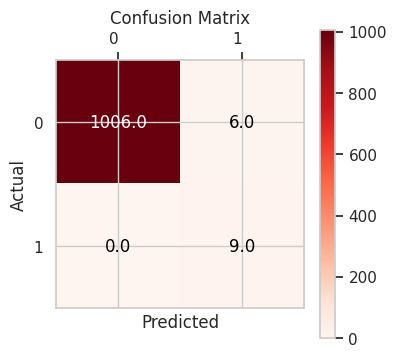

In [ ]:
# Define the class labels
class_labels = ['0', '1']

# Create a heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(4, 4))
im = ax.imshow(confusion_matrix, cmap='Reds')

# Add colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Add ticks and labels to the plot
ax.set_xticks(np.arange(len(class_labels)))
ax.set_yticks(np.arange(len(class_labels)))
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels)
ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

# Rotate the tick labels and set their alignment
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations
for i in range(len(class_labels)):
    for j in range(len(class_labels)):
        text = ax.text(j, i, confusion_matrix[i, j],
                       ha="center", va="center", color="white" if confusion_matrix[i, j] > 0.5 * confusion_matrix.max() else "black")

# Set plot title and axis labels
ax.set_title("Confusion Matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")

# Show the plot
plt.show()


# Overview

In [ ]:
# Store the accuracy of each individual classifier
accuracy_list = [dt_accuracy, rf_accuracy, gb_accuracy,svc_accuracy,nb_accuracy, vc_accuracy, ad_accuracy, rfc_accuracy, fed_accuracy]
aucroc_list = [dt_auroc, rf_auroc, gb_auroc,svc_auroc,nb_auroc, vc_auroc, ad_auroc, rfc_auroc, fed_auroc]
precision_list = [dt_precision, rf_precision, gb_precision,svc_precision,nb_precision, vc_precision, ad_precision, rfc_precision, fed_precision]

f1_list = [dt_f1, rf_f1, gb_f1, svc_f1, nb_f1, vc_f1, ad_f1, rfc_f1, f_f1]

recall_list = [dt_recall, rf_recall, gb_recall,svc_recall,nb_recall, vc_recall, ad_recall, rfc_recall, fed_recall]
selectivity_list = [d_sel, r_sel, g_sel, s_sel, n_sel, e_sel, a_sel, rc_sel, f_sel]

tns = [d_tn, r_tn, g_tn, s_tn, n_tn, e_tn, a_tn, rc_tn, f_tn]
fps = [d_fp, r_fp, g_fp, s_fp, n_fp, e_fp, a_fp, rc_fp, f_fp]
fns = [d_fn, r_fn, g_fn, s_fn, n_fn, e_fn, a_fn, rc_fn, f_fn]
tps = [d_tp, r_tp, g_tp, s_tp, n_tp, e_tp, a_tp, rc_tp, f_tp]

In [ ]:
data_metrics = {'Model': ['DT','RF', 'GB', 'SVC', 'NB', 'EN', 'AD', 'RFC', 'FEDL'],
        'True_Negatives': tns,
        'False_Positives': fps,
        'False_Negatives': fns,
        'True_Positive': tps,
        'Accuracy': accuracy_list,
        'Precision': precision_list,
        'Recall': recall_list,
        'F1 Score': f1_list,
        'AUC ROC': aucroc_list,
        'Selectivity': selectivity_list
        }

# Selectivity = TN / (TN + FP)

# create dataframe
dfm = pd.DataFrame(data_metrics)

print(dfm)

  Model  True_Negatives  False_Positives  False_Negatives  True_Positive  \
0    DT          1003.0              8.0              0.0            5.0   
1    RF          1003.0              8.0              0.0            5.0   
2    GB          1003.0              8.0              0.0            5.0   
3   SVC          1003.0              8.0              0.0            5.0   
4    NB          1003.0              8.0              0.0            5.0   
5    EN          1003.0              8.0              0.0            5.0   
6    AD          1003.0              8.0              0.0            5.0   
7   RFC          1003.0              8.0              0.0            5.0   
8  FEDL          1006.0              6.0              0.0            9.0   

   Accuracy  Precision  Recall  F1 Score   AUC ROC  Selectivity  
0  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
1  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
2  0.992126   0.384615     1.0  0.555556 

```
The new new
#20
  Model  True_Negatives  False_Positives  False_Negatives  True_Positive  \
0    DT          1003.0              8.0              0.0            5.0   
1    RF          1003.0              8.0              0.0            5.0   
2    GB          1003.0              8.0              0.0            5.0   
3   SVC          1003.0              8.0              0.0            5.0   
4    NB          1003.0              8.0              0.0            5.0   
5    EN          1003.0              8.0              0.0            5.0   
6    AD          1003.0              8.0              0.0            5.0   
7   RFC          1003.0              8.0              0.0            5.0   
8  FEDL          1006.0              6.0              0.0            9.0   

   Accuracy  Precision  Recall  F1 Score   AUC ROC  Selectivity  
0  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
1  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
2  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
3  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
4  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
5  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
6  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
7  0.992126   0.384615     1.0  0.555556  0.996044     0.992087  
8  0.994123   0.600000     1.0  0.750000  0.998353     0.994071

#30
  Model  True_Negatives  False_Positives  False_Negatives  True_Positive  \
0    DT          1505.0             11.0              0.0            8.0   
1    RF          1505.0             11.0              0.0            8.0   
2    GB          1505.0             11.0              0.0            8.0   
3   SVC          1503.0             13.0              0.0            8.0   
4    NB          1505.0             11.0              0.0            8.0   
5    EN          1505.0             11.0              0.0            8.0   
6    AD          1505.0             11.0              0.0            8.0   
7   RFC          1505.0             11.0              0.0            8.0   
8  FEDL          1506.0             12.0              0.0           11.0   

   Accuracy  Precision  Recall  F1 Score   AUC ROC  Selectivity  
0  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
1  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
2  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
3  0.991470   0.380952     1.0  0.551724  0.995712     0.991425  
4  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
5  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
6  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
7  0.992782   0.421053     1.0  0.592593  0.996372     0.992744  
8  0.992152   0.478261     1.0  0.647059  0.997395     0.992095  


#40
  Model  True_Negatives  False_Positives  False_Negatives  True_Positive  \
0    DT          2005.0             16.0              0.0           11.0   
1    RF          2005.0             16.0              0.0           11.0   
2    GB          2005.0             16.0              0.0           11.0   
3   SVC          2005.0             16.0              0.0           11.0   
4    NB          2005.0             16.0              0.0           11.0   
5    EN          2005.0             16.0              0.0           11.0   
6    AD          2005.0             16.0              0.0           11.0   
7   RFC          2005.0             16.0              0.0           11.0   
8  FEDL          2005.0             19.0              0.0           15.0   

   Accuracy  Precision  Recall  F1 Score   AUC ROC  Selectivity  
0  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
1  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
2  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
3  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
4  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
5  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
6  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
7  0.992126   0.407407     1.0  0.578947  0.996042     0.992083  
8  0.990682   0.441176     1.0  0.612245  0.996887     0.990613

#50
Model  True_Negatives  False_Positives  False_Negatives  True_Positive  \
0    DT          2509.0             18.0              0.0           12.0   
1    RF          2509.0             18.0              0.0           12.0   
2    GB          2509.0             18.0              0.0           12.0   
3   SVC          2509.0             18.0              0.0           12.0   
4    NB          2509.0             18.0              0.0           12.0   
5    EN          2509.0             18.0              0.0           12.0   
6    AD          2509.0             18.0              0.0           12.0   
7   RFC          2509.0             18.0              0.0           12.0   
8  FEDL          2502.0             20.0              1.0           18.0   

   Accuracy  Precision    Recall  F1 Score   AUC ROC  Selectivity  
0  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
1  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
2  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
3  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
4  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
5  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
6  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
7  0.992911   0.400000  1.000000  0.571429  0.996438     0.992877  
8  0.991736   0.473684  0.947368  0.631579  0.996786     0.992070

```

```
# 50-50 Split
Model  Accuracy   AUC ROC  Precision  Recall
0    DT  0.994094  0.997024   0.571429    1.00
1    RF  0.992126  0.872024   0.500000    0.75
2    GB  0.994094  0.997024   0.571429    1.00
3   SVC  0.994094  0.997024   0.571429    1.00
4    NB  0.994094  0.997024   0.571429    1.00
5    EN  0.994094  0.997024   0.571429    1.00
6    AD  0.994094  0.997024   0.571429    1.00
7   RFC  0.994094  0.997024   0.571429    1.00
8  FEDL  0.992188  0.996647   0.555556    1.00
```
```
#60-40 Split
  Model  Accuracy   AUC ROC  Precision  Recall
0    DT  0.993602  0.996776   0.551724     1.0
1    RF  0.993602  0.996776   0.551724     1.0
2    GB  0.993602  0.996776   0.551724     1.0
3   SVC  0.993602  0.996776   0.551724     1.0
4    NB  0.993602  0.996776   0.551724     1.0
5    EN  0.993602  0.996776   0.551724     1.0
6    AD  0.993602  0.996776   0.551724     1.0
7   RFC  0.993602  0.996776   0.551724     1.0
8  FEDL  0.994605  0.996904   0.642857     0.6
```
```
#70-30 Split
  Model  Accuracy   AUC ROC  Precision  Recall
0    DT  0.993602  0.996776   0.551724     1.0
1    RF  0.993602  0.996776   0.551724     1.0
2    GB  0.993602  0.996776   0.551724     1.0
3   SVC  0.993602  0.996776   0.551724     1.0
4    NB  0.993602  0.996776   0.551724     1.0
5    EN  0.993602  0.996776   0.551724     1.0
6    AD  0.993602  0.996776   0.551724     1.0
7   RFC  0.993602  0.996776   0.551724     1.0
8  FEDL  0.994605  0.996904   0.642857     0.6
```
```
  Model  Accuracy   AUC ROC  Precision  Recall
0    DT  0.993110  0.996538   0.416667     1.0
1    RF  0.993110  0.996538   0.416667     1.0
2    GB  0.993110  0.996538   0.416667     1.0
3   SVC  0.993110  0.996538   0.416667     1.0
4    NB  0.993110  0.996538   0.416667     1.0
5    EN  0.993110  0.996538   0.416667     1.0
6    AD  0.993110  0.996538   0.416667     1.0
7   RFC  0.993110  0.996538   0.416667     1.0
8  FEDL  0.994123  0.998188   0.600000     1.0
```

# PLOT

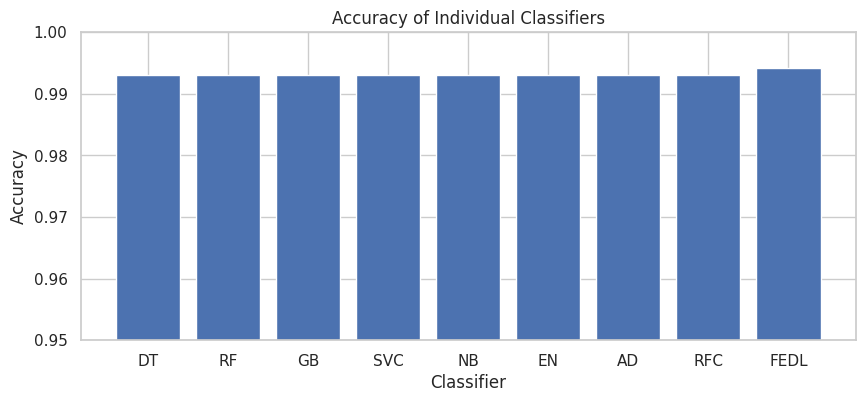

In [ ]:
# Plot the accuracy of each individual classifier
plt.figure(figsize=(10, 4))
plt.bar(['DT','RF', 'GB', 'SVC', 'NB', 'EN', 'AD', 'RFC', 'FEDL'], accuracy_list)
plt.ylim([0.95, 1.0])
plt.title('Accuracy of Individual Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.show()

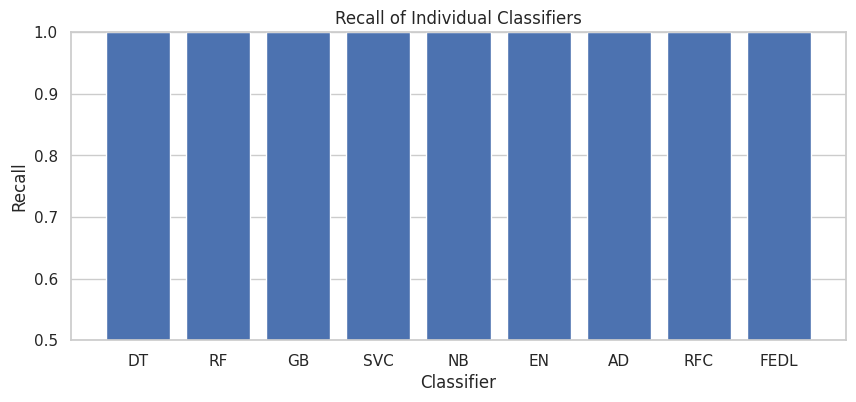

In [ ]:
# Plot the recall of each individual classifier
plt.figure(figsize=(10, 4))
plt.bar(['DT','RF', 'GB', 'SVC', 'NB', 'EN', 'AD', 'RFC', 'FEDL'], recall_list)
plt.ylim([0.5, 1.0])
plt.title('Recall of Individual Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.show()

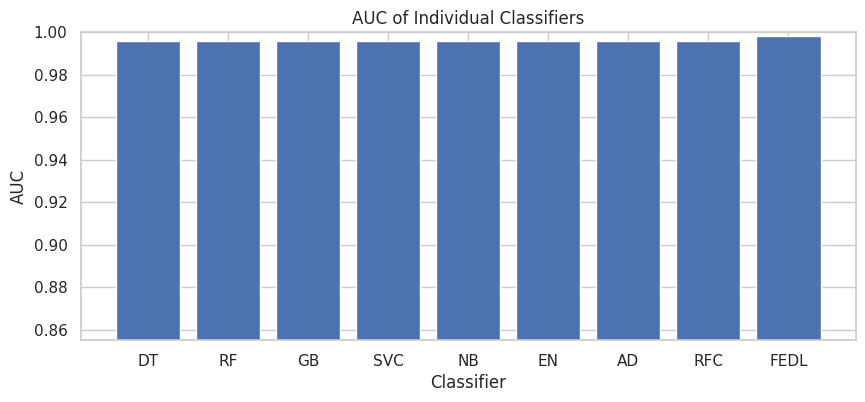

In [ ]:
# Plot the auc of each individual classifier
plt.figure(figsize=(10, 4))
plt.bar(['DT','RF', 'GB', 'SVC', 'NB', 'EN', 'AD', 'RFC', 'FEDL'], aucroc_list)
plt.ylim([0.855, 1.0])
plt.title('AUC of Individual Classifiers')
plt.xlabel('Classifier')
plt.ylabel('AUC')
plt.show()

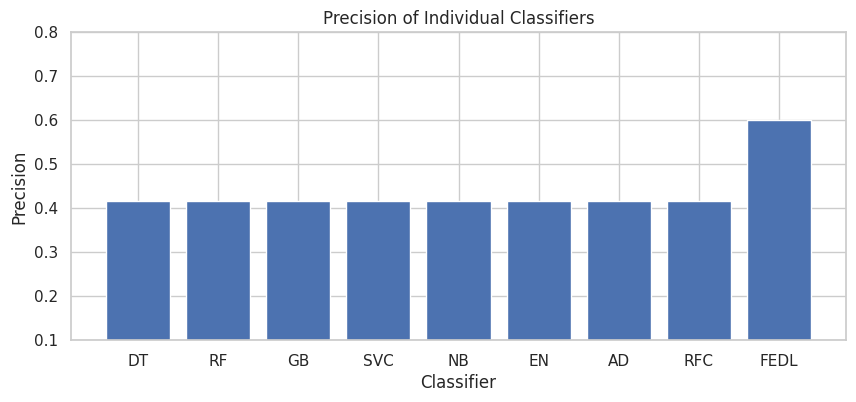

In [ ]:
# Plot the precision of each individual classifier
plt.figure(figsize=(10, 4))
plt.bar(['DT','RF', 'GB', 'SVC', 'NB', 'EN', 'AD', 'RFC', 'FEDL'], precision_list)
plt.ylim([0.1, 0.8])
plt.title('Precision of Individual Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.show()